# Finding the Secret to Academic Success 

- Student name: Gamze Turan
- Student pace: self paced
- Scheduled project review date/time: September, 28 2022 / 11:30 am
- Instructor name: Claude Fried

| ![space-1.jpg](images/image_1.jpg) |
|:--:|
| <b>Fig.1 Student taking part in an exam (Image Credits -  Photo by <a href="https://unsplash.com/@jeswinthomas?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Jeswin Thomas</a>)
  </b>|

## Overview 

My goal is to examine the **effects of several socio-economic factors** on the **grades of secondary school students.** These analyses will allow us to predict student performance based upon a variety of features like study hours, alcohol comsumption, parent's education, etc.

I will run some interesting analysis like -

  1. Effect of Alcohol consumption on Student performance.
  2. Does being in a relationship affect high school student performance?
  3. Impact of a parent's education on student grades. This can be very useful as a lot of schools use parent's education as a criteria for admission. This analysis can present an argument either in favor or against this approach.
  
Finally, I will create various machine learning models to predict student's final performance and then compare these models using a set of accuracy metrics.

I will be using **[CRISP-DM](https://thinkinsights.net/data-literacy/crisp-dm/)** data scheme process for this project.

## Business Understanding

My initial focus will be on understanding whether **alcohol comsumption** can have an **impact on student performance** or not. In United States, one in four individuals between the ages of 12 and 20 reported ninge drinking alcohol on a monthly basis ([source:niaaa.nih.gov](https://www.niaaa.nih.gov/publications/brochures-and-fact-sheets/underage-drinking)).Underage drinking has become a very serious health concern and binge drinking by young people poses enormous health and safety risks.

There has been a steady rise in the number of teenagers found driving under the influence and this behaviour often leads to serious accidents resulting in property damage, injuries, and sometimes deadth as well ([source:drugfree.org](https://drugfree.org/drug-and-alcohol-news/23-of-teenssurveyed-admit-to-driving-under-influence-of-alcohol-or-drugs/)). Thus, it is critical that we implement prevention strategies during early adolescence to prevent escalation in alcohol consumption.

I will run similar analyses for multiple factors. Based upon my observations, I will try to build a **persona of a model student** who has the highest chance of academic success.

This information can then be used by school districts, academic counsellors, and parents to help guide their students towards better school performance.

## Data Understanding 

I will use the [UCI Machine Learning Repository: Student Performance Data Set](http://archive.ics.uci.edu/ml/datasets/Student+Performance) to present interesting insights about the factors that predict student performance.

> Source:
  P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In
  A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference
  (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
  Available at: [Web Link](www3.dsi.uminho.pt/pcortez/student.pdf).
  
This data contains student achievement information in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics(`student-mat.csv`) and Portuguese language(`student-por.csv`).

In [Cortez and Silva, 2008](www3.dsi.uminho.pt/pcortez/student.pdf), the two datasets were modeled under binary/five-level classification and regression tasks.

### Import Libraries

In [62]:
# Data handling
import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

# Statistical tests
import statsmodels.api as sm
import scipy

# Standard ML Models for comparison
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Sklearn utilities
from sklearn.model_selection import (
    cross_val_predict,
    KFold,
    cross_val_score,
    GridSearchCV,
    train_test_split,
    RandomizedSearchCV,
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score)

from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Preparation

In [63]:
# Load dataset for two subjects, Math and Portuguese
mat_df = pd.read_csv("data/student-mat.csv", sep=';')
por_df = pd.read_csv("data/student-por.csv", sep=';')

Let's take a look at both the datasets

In [64]:
#students studying portugese
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [65]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

**Observations:**

 - There are no missing values in the dataset containning info about students studying portugese
 - All the data types seem okay and don't need any explicit cleaning.We will dive further into the columns during EDA.

In [66]:
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [67]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Observations:**

 - While portugese has a total of 649 students, mathematics has 395 students. Both dataset have the same columns.
 - No null values in this datasets as well.
 
Now, we will merge both the dataset together.

In [68]:
# Merging both the dataframes using concatenation
student_df = pd.concat([mat_df, por_df], ignore_index=True)
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [69]:
print('Total number of students:' ,len(student_df))

Total number of students: 1044


Let's rename some of the columns to make the dataset unambiguous.

In [70]:
list(student_df)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [71]:
student_df.rename(columns = {'famsize':'family_size', 'Pstatus':'parent_status', 'Medu':'mother_education','Fedu':'father_education', 
                             'Mjob':'mother_job', 'Fjob':'father_job','traveltime':'commute_time', 'studytime':'study_time', 
                             'schoolsup':'school_support', 'famsup':'family_support', 'paid':'paid_classes', 'higher':'desire_higher_edu',
                             'famrel':'family_quality', 'freetime':'free_time', 'goout':'go_out', 'Dalc':'weekday_alcohol_usage', 
                             'Walc':'weekend_alcohol_usage', 'G1':'period1_score', 'G2':'period2_score', 'G3':'final_score'}, inplace = True)

In [72]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parent_status          1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support       

In [73]:
# Look for missing values
student_df.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
period1_score            0
period2_score            0
final_score              0
dtype: int64

**Observations:**

 - No null values in the dataset.
 - Target variable is the `final_score` columns.

The dataset is now ready for analysis. Our target variable is `final_score` and we have a total of 32 features.

As the data comes from a study, it is relatively clean and does not require extensive cleaning procedures. I will however need to perform formating options to get the data ready for machine learning. 

I will look at them later on. 

## EDA - Exploratory Data Analysis

### Target Variable (final_score)

In [74]:
# general statistics 
student_df['final_score'].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: final_score, dtype: float64

So, the grade lies between 0 and 20.The average grade is roughly 56% at 11.34. Let's look at the distribution of grades to find more information.

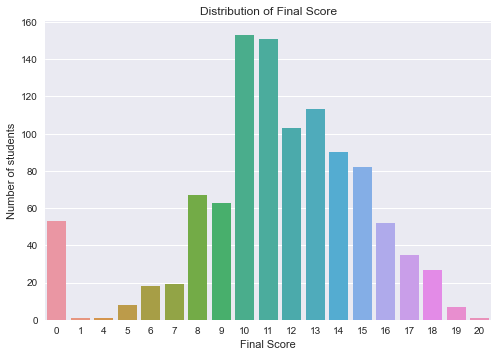

In [75]:
# final score distribution
tmp_plt = sns.countplot(x = 'final_score', data = student_df)
tmp_plt.axes.set_title('Distribution of Final Score')
tmp_plt.set_xlabel('Final Score')
tmp_plt.set_ylabel('Number of students')
#plt.savefig('images/final_score_distribution ')
plt.show()

Overall, the distribution looks like a normal distribution which is ideal. 

But, there are a lot of students that score 0 in the final grade. This is intriguing. We can expect some zero values but definitely not so many. 

In [76]:
print('Number of students that scored 0:',len(student_df[student_df['final_score']==0]))

Number of students that scored 0: 53


Reading the [source paper](www3.dsi.uminho.pt/pcortez/student.pdf), we realized that this can be due to multiple reasons:
1. Student actually scored a zero on the exam
2. Student dropped out of school before the exam
3. School barred the student from taking the exam

Let's try and analyze this further. Who has a higher chance of scoring a zero - male or a female. 

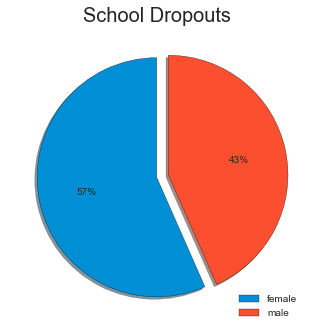

In [77]:
# Draw Pie-Chart of frequency distribution for internet access
plt.style.use('seaborn')
total_dropout = student_df[student_df['final_score']==0]['sex'].value_counts().to_frame().T
labels = 'female', 'male'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_dropout.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('School Dropouts',fontsize = 20)
#plt.savefig('images/school_dropouts')
plt.show()

This is weird. More females are scoring 0 vs males. Usually females have better performance, then why are more females scoring 0 in their final exams. These must be dropouts. But what exactly is causing these females to drop out of high school?

Let's look at the relationship status of the females that are dropping out of school.

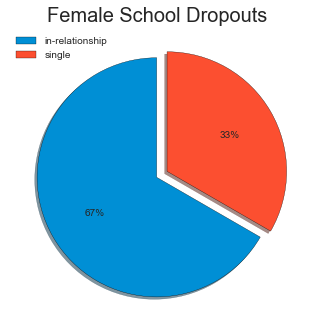

In [78]:
# Draw Pie-Chart of frequency distribution of relationship status of females dropping out of school
plt.style.use('seaborn')
total_dropout = student_df[(student_df['final_score']==0)&(student_df['sex']=='F')]['romantic'].value_counts().to_frame().T
labels = 'in-relationship', 'single'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_dropout.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Female School Dropouts',fontsize = 20)
#plt.savefig('images/Female_school_dropouts')
plt.show()

There are many [reports](https://www.caf.com/en/knowledge/views/2021/01/teen-pregnancy-as-a-cause-of-school-dropout/) that suggest that as many as 36% of high-school dropouts can be attributed to teen pregnancy!

Having multiple reasons for a 0 final score might complicate things for us and we will consider removing these values before creating our machine learning models.

## Gender

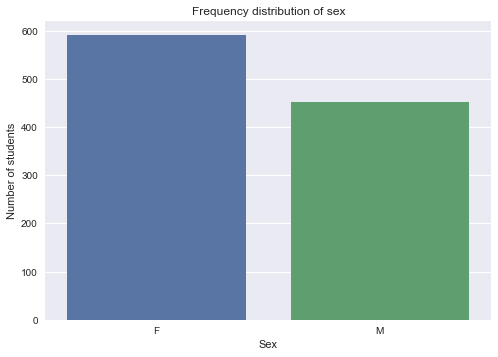

In [79]:
# creating frequency distribution of gender countplot
tmp_plt = sns.countplot(x = "sex", data = student_df)
tmp_plt.axes.set_title('Frequency distribution of sex')
tmp_plt.set_xlabel('Sex')
tmp_plt.set_ylabel('Number of students')
#plt.savefig('images/frequency_dist_sex')
plt.show()

There are a higher number of females in the dataset.Let's see if gender has any relationship with academic success.

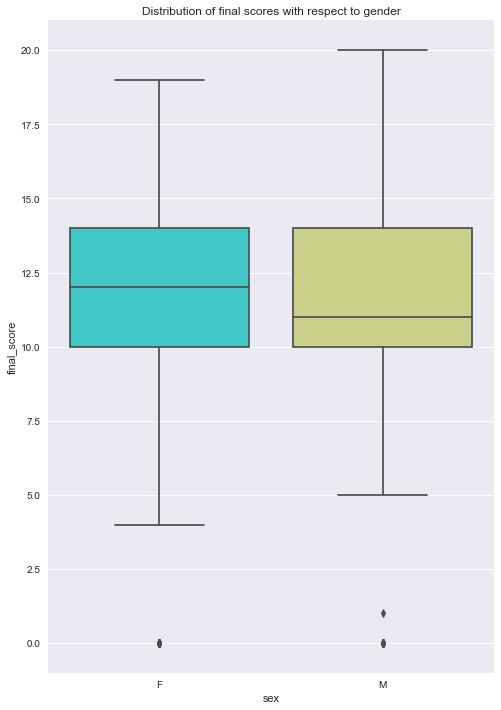

In [80]:
plt.figure(figsize=(8, 12))
plt.title("Distribution of final scores with respect to gender")
sns.boxplot(y="final_score", x="sex", data = student_df, palette ="rainbow");
#plt.savefig('images/dist_final_gender')

From the graph, I can see that overall distribution of scores is very similar for both the genders. The median final score is slightly lower for males than females.

In [81]:
print('Median final score for males:', student_df[student_df['sex']=='M']['final_score'].median())
print('Median final score for females:', student_df[student_df['sex']=='F']['final_score'].median())

Median final score for males: 11.0
Median final score for females: 12.0


Let's see if this difference is significant by running a [t-test](https://www.investopedia.com/terms/t/t-test.asp):

In [82]:
male_student_scores = student_df[student_df['sex']=='M']['final_score'].values
female_student_scores = student_df[student_df['sex']=='F']['final_score'].values

In [83]:
# Running a two-tailed t test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value,p_value=scipy.stats.ttest_ind(male_student_scores,female_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is -1.016422
p-value for two tailed test is 0.309664


In [84]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between male and female final scores is statistically significant')
else:
    print('Difference between male and female final scores is not statistically significant')

Difference between male and female final scores is not statistically significant


So, while the graph showed some difference between the final scores of both genders, this difference is not statistically significant.

## Age

In [85]:
# Frequency distribution of student age
student_df["age"].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

In [86]:
# Pie chart for age frequency distribution
ages = student_df["age"].value_counts().sort_index()

# all ages
labels = (np.array(ages.index))

# corresponding percentages of each age
sizes = (np.array((ages / ages.sum())*100))

# plotting pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)], layout=go.Layout(title="Student Age"))
#plt.savefig('images/student_age')
py.iplot(fig, filename = "age")

Students are between `15` and `22` years old. `16` and `17` year olds are the most common. Let's see if age can determine academic success:

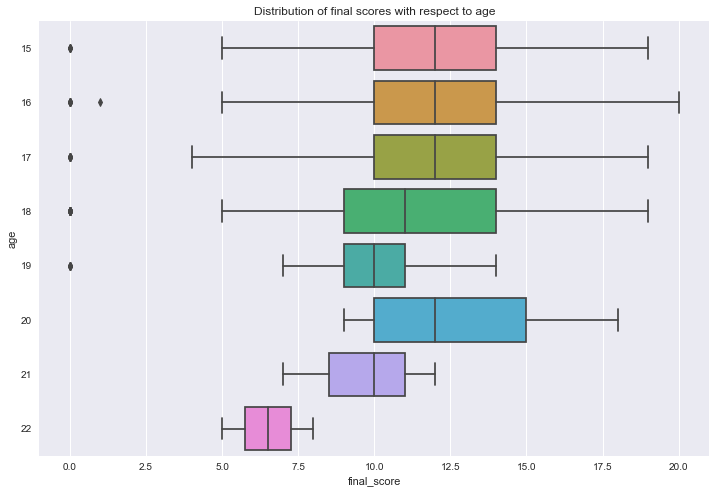

In [87]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to age")
sns.boxplot(y="age", x="final_score", orient = 'h', data = student_df);
#plt.savefig('images/dist_final_age')

The boxplots seem to indicate that higher ages(20-22) result in poor grades.But we saw in value counts, that these 3 ages had only few datapoints.Let's look at the swarmplot here:

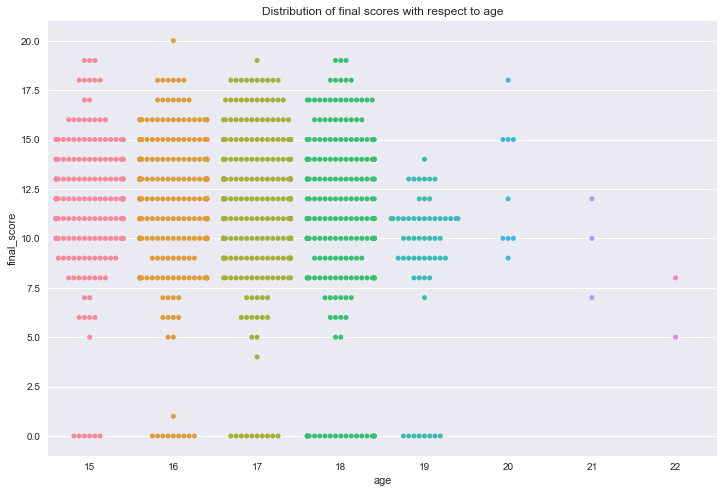

In [88]:
plt.figure(figsize = (12,8))
plt.title("Distribution of final scores with respect to age")
sns.swarmplot(y="final_score", x="age", data = student_df);
#plt.savefig('images/dist_final_age2')

Now it is clear that it's only lack of data in the last three ages (20,21 and 22). Otherwise, age does not seem to affect final score. I can look at age and sex together. 

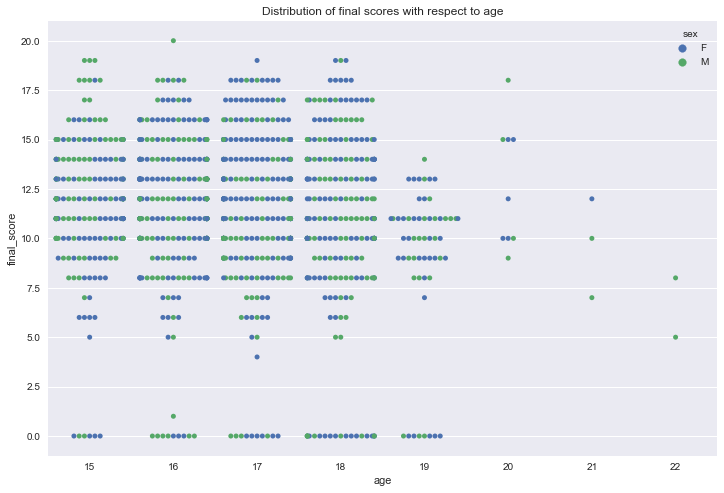

In [89]:
plt.figure(figsize = (12,8))
plt.title("Distribution of final scores with respect to age")
sns.swarmplot(y="final_score", x="age", hue="sex", data = student_df);
#plt.savefig('images/dist_final_age_sex')

The above graph indicates that there is no clear relation of age or gender with final score.

This is good news.While using machine learning for business applications, I must cafefully not to propogate any bias towards any demographic.Now, that these features are not directly related to the model, I can choose to remove them in my final model.

## Study Time

According to [data documentation](https://archive.ics.uci.edu/ml/datasets/student+performance), `studytime` column encodes weekly study time of student where:

 - 1 -<2 hours
 - 2 -2 to 5 hours
 - 3 -5 to 10 hours
 - 4 - >10 hours
 

In [90]:
# function to convert study time encoding to actual meaning
def convertor_function(study_time):
    if study_time == 1:
        return '<2 hours'
    elif study_time == 2:
        return '2 to 5 hours'
    elif study_time == 3:
        return '5 to 10 hours'
    elif study_time == 4:
        return '>10 hours'
    
student_df['new_study_time'] = student_df['study_time'].apply(convertor_function)

student_df[['study_time', 'new_study_time']].sample(10)

,study_time,new_study_time
197,1,<2 hours
322,3,5 to 10 hours
932,1,<2 hours
797,3,5 to 10 hours
157,1,<2 hours
681,1,<2 hours
51,2,2 to 5 hours
129,1,<2 hours
990,1,<2 hours
1014,2,2 to 5 hours


Let's look at the distribution of study time.

In [91]:
# Pie chart for study frequency distribution
study_times = student_df["new_study_time"].value_counts().sort_index()

# all study times
labels = (np.array(study_times.index))

# corresponding percentages of each age
sizes = (np.array((study_times / study_times.sum())*100))

# plotting pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)], layout=go.Layout(title="Student Study Time"))
plt.savefig('images/study_time')
py.iplot(fig, filename="study_time")

<Figure size 576x396 with 0 Axes>

Almost 50% of the student in the dataset study 2-5 hours. Let's see if there is a relationship between study time and final score using boxplots:

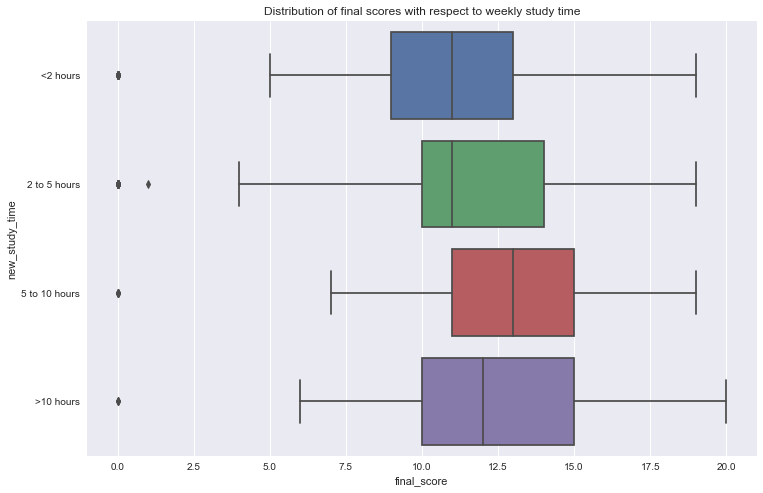

In [92]:
plt.figure(figsize=(12,8))
o = ['<2 hours','2 to 5 hours','5 to 10 hours','>10 hours']
plt.title("Distribution of final scores with respect to weekly study time")
sns.boxplot(y="new_study_time", x="final_score", orient='h',order=o, data = student_df);
#plt.savefig('images/dist_final_weekly_st')

In [93]:
print('Average score of students studying <2 hours weekly', student_df[student_df['new_study_time']=='<2 hours'].final_score.mean())
print('Average score of students studying 2 to 5 hours weekly', student_df[student_df['new_study_time']=='2 to 5 hours'].final_score.mean())
print('Average score of students studying 5 to 10 hours weekly', student_df[student_df['new_study_time']=='5 to 10 hours'].final_score.mean())
print('Average score of students studying >10 hours weekly', student_df[student_df['new_study_time']=='>10 hours'].final_score.mean())

Average score of students studying <2 hours weekly 10.580441640378549
Average score of students studying 2 to 5 hours weekly 11.335984095427435
Average score of students studying 5 to 10 hours weekly 12.493827160493828
Average score of students studying >10 hours weekly 12.274193548387096


I see that as study time increases, the avarage score of the student increases. I can run a hypothesis test to check for significance of this result.

In [94]:
study_less_than_2_scores = student_df[student_df['new_study_time']=='<2 hours'].final_score
study_2_to_5_scores = student_df[student_df['new_study_time']=='2 to 5 hours'].final_score
study_5_to_10_scores = student_df[student_df['new_study_time']=='5 to 10 hours'].final_score
study_greater_than_10_scores = student_df[student_df['new_study_time']=='>10 hours'].final_score

I will run a [One-Way ANOVA test](https://www.simplypsychology.org/anova.html) to check if there is exists a statistically significant difference between the mean score of different study time.

In [95]:
# running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value, p_value = scipy.stats.f_oneway(study_less_than_2_scores, study_2_to_5_scores, study_5_to_10_scores, study_greater_than_10_scores)

print('Test statistics is %f'%float("{:.6f}".format(t_value)))
print('p_value for ANOVA test is %f'%p_value)

Test statistics is 10.374445
p_value for ANOVA test is 0.000001


In [96]:
alpha = 0.05
#testing for significance
if p_value<=alpha:
    print('Difference between final scores for different study time is statistically significantly')
else:
    print('Difference between final scores for different study time is not statistically significantly')

Difference between final scores for different study time is statistically significantly


Thus, I see that in the data, study time is a significant component for academic success and studying more will lead to better results.

## Address (U - Urban, R- Rural)

`address` column contains information about student's home address type.

 - "U" -urban
 - "R" -rural
 
This might be an important feature predicting academic success.Urban students might have easier access to alcohol and other fun activities which can result in distraction.Rural students might have less incentive to go to school.Let's look at their frequency distribution first.

In [97]:
student_df['address'].value_counts()

U    759
R    285
Name: address, dtype: int64

So, vast majority are urban students.Let's see if a direct relationship exists between address and final_grade.

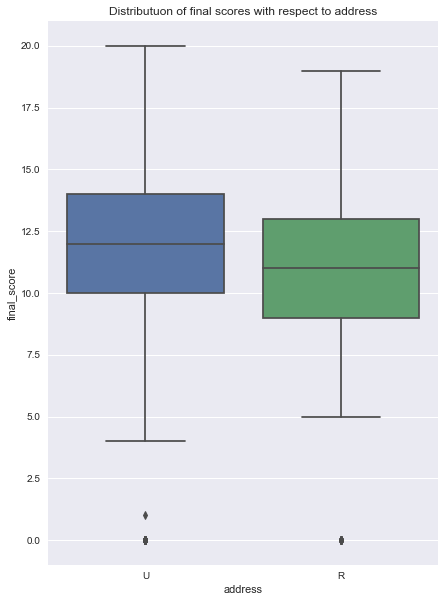

In [99]:
plt.figure(figsize=(7,10))
plt.title("Distributuon of final scores with respect to address")
sns.boxplot(y="final_score", x="address", data = student_df);
#plt.savefig('images/dist_final_address')

Boxplots indicate that students residing in urban areas tend to perform better than students residing in rural areas.Let's look at the distributions further using [KDE plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to better understand the differences.

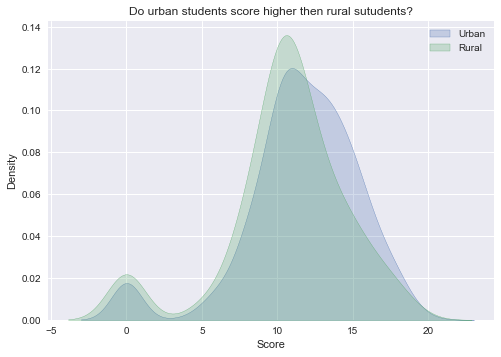

In [100]:
sns.kdeplot(student_df[student_df['address'] == 'U']['final_score'], label='Urban', shade = True)
sns.kdeplot(student_df[student_df['address'] == 'R']['final_score'], label='Rural', shade = True)
plt.title( 'Do urban students score higher then rural sutudents?')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
#plt.savefig('images/urban_rural_student')
plt.show()

In this plot, both the distribution seem similar.Let's run a two-tailed t-test to check whether the difference in the mean score for urban students and the mean score for ruarl students is statiscally significant.

In [101]:
urban_student_scores = student_df[student_df['address'] == 'U']['final_score'].values
rural_student_scores = student_df[student_df['address'] == 'R']['final_score'].values

In [102]:
# Running a two-tailded t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value, p_value = scipy.stats.ttest_ind(urban_student_scores, rural_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test id %f'%p_value)

Test statistic is 3.825806
p-value for two tailed test id 0.000138


In [103]:
alpha = 0.05
#testing for significance
if p_value<=alpha:
    print('Difference between urban and rural final scores is statistacally significant')
else:
    print('Difference between urban and rural final scores is not statistically significant')

Difference between urban and rural final scores is statistacally significant


Now I know that Rural students tend to score less than Urban ones.Let's try and analyze a variety of factors that might cause this.One of them I believe is `commute_time`.

According to [data documentation](https://archive.ics.uci.edu/ml/datasets/student+performance), `commute_time` column encodes home to school travel time of a student where:

 - 1 - <15 mins
 - 2 - 15 to 30 mins
 - 3 - 30 mins to 1 hour
 - 4 - >1 hour

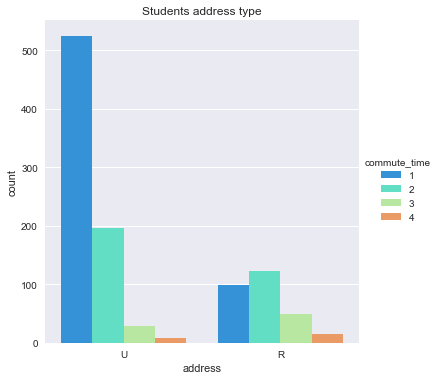

In [104]:
sns.catplot(x="address", kind="count", hue = "commute_time", palette = "rainbow", data = student_df)
plt.title("Students address type")
#plt.savefig('images/student_address_type')
plt.show()

It seems like rural students tend to have higher commute times.

In [105]:
print('Number of Rural Students with commute time > 1 hour:', len(student_df[(student_df['address']=='R') & (student_df['commute_time']==4)]))
print('Number of Urban Students with commute time > 1 hour:',len(student_df[(student_df['address']=='U') & (student_df['commute_time']==4)]))

Number of Rural Students with commute time > 1 hour: 15
Number of Urban Students with commute time > 1 hour: 9


It is well known that students with higher commute thime usually get less time to study and thus there studies suffer.(Source: [Kobus et al.,2018](https://www.sciencedirect.com/science/article/abs/pii/S0166046215000216))

Let's see if that happens in this dataset as well:

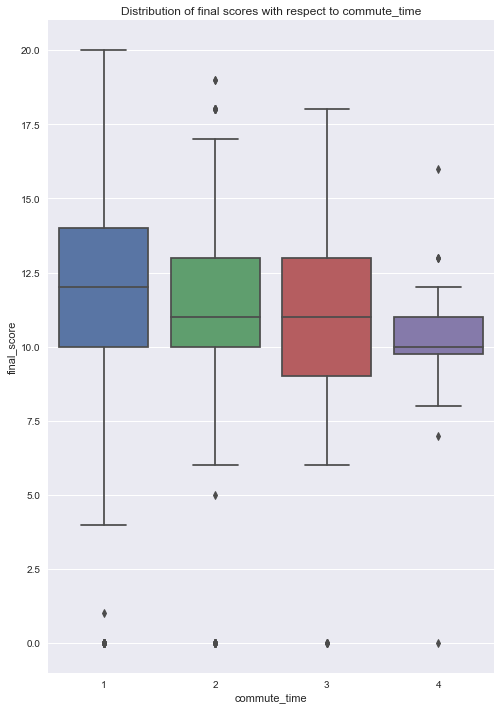

In [106]:
plt.figure(figsize=(8,12))
plt.title("Distribution of final scores with respect to commute_time")
sns.boxplot(y="final_score", x="commute_time", data = student_df);
#plt.savefig('images/dist_final_commute_time')

The graph clearly depicts a downward trend with respect to travel time.

Schools in many countries consider commute time a criteria while admitting students.There are multiple studies that indicate higher commute times have adverse affect on student health as well(Source:[Pradhan et al.,2017](https://www.researchgate.net/publication/313851579_Impact_of_commuting_distance_and_school_timing_on_sleep_of_school_students)).

So, this graph tends as a proof that parents should prefer schools with lower commute times.

Another factor that might lead to the poor performance of ruaral students is access to `internet`.

`internet` column encodes whether a student has access to internet or not at home.Let's look at the frequency distribution for internet access.

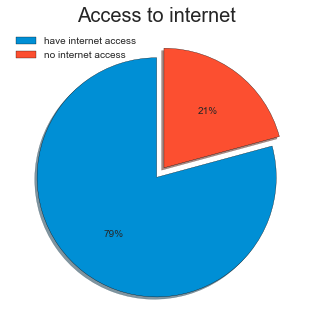

In [107]:
# Draw Pie-Chart of frequency distribution for internet access
plt.style.use('seaborn')
total_internet = student_df['internet'].value_counts().to_frame().T
labels = 'have internet access', 'no internet access'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Access to internet', fontsize = 20)
#plt.savefig('images/access_to_internet')
plt.show()

Roughly 80% of all students in the dataset have access to internet.Let's see if this distribution is different for rural and urban areas.

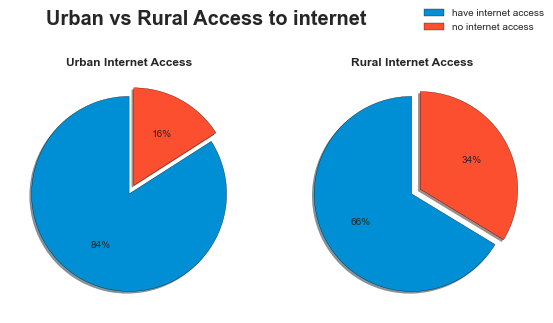

In [108]:
# Draw Pie-Chart of frequency distribution for internet access for urban and rural areas
plt.style.use('seaborn')
urban_internet = student_df[student_df['address']=='U']['internet'].value_counts().to_frame().T
rural_internet = student_df[student_df['address']=='R']['internet'].value_counts().to_frame().T

labels = 'have internet access', 'no internet access'
colors = ['#008fd5', '#fc4f30']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0, 0.1)

plt.tight_layout()
ax[0].pie(urban_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Urban Internet Access', fontweight='bold')

ax[1].pie(rural_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Rural Internet Access', fontweight='bold')



fig.legend(labels=labels, fontsize='medium')
plt.suptitle('Urban vs Rural Access to internet', fontsize = 20, fontweight='bold', x = 0.4)
#plt.savefig('images/U_R_Access_to_internet')
plt.show()

As expected, ahigher proportion of urban students have access to internet. 84% of urban students have access to internet vs 66% students with internet access for rural areas.

Studies have shown that having access to internet improves academic performance([Source : NCES](https://nces.ed.gov/pubs2017/2017098/ind_15.asp)).Let's see if that's the case in this dataset as well.

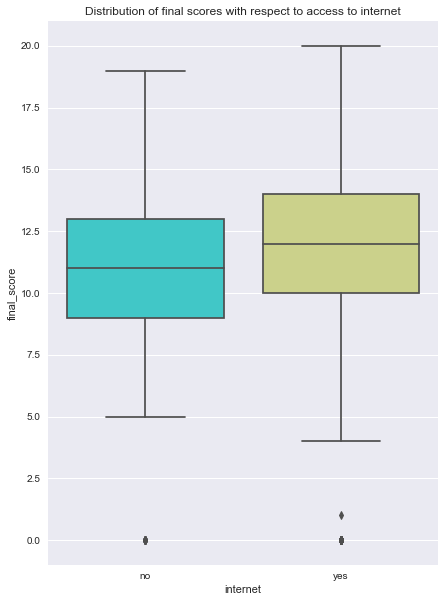

In [109]:
plt.figure(figsize=(7,10))
plt.title("Distribution of final scores with respect to access to internet")
sns.boxplot(y="final_score", x="internet", data = student_df, palette ="rainbow");
#plt.savefig('images/dist_final_access_to_internet')

Box plot indicates a higher score for students with internet access.

In [110]:
print('Mean final score for students with internet access:', student_df[student_df['internet'] == 'yes']['final_score'].median())
print('Mean final score for students without internet access:', student_df[student_df['internet'] == 'no']['final_score'].median())

Mean final score for students with internet access: 12.0
Mean final score for students without internet access: 11.0


Thus, if students get internet access at home, they tend to perform better.It is important to monitor student internet usage though, as it might lead to an endless cycle of video games or youtube videos.

School districs should also work with students who don't have access to internet and see if some arrangements can be made to help such students in this day and age of online learning.Some tips include:

 1. Encouraging students to use community resources like public libraries.
 2. Make remote learning accessible through offline features.
 3. Provid mobile hotspots to students from disadvantaged backgrounds.

## Wish to go for Higher Education

`desire_higher_edu` column indicates whether student wants to take higher education or not.Let's look at its frequency distribution:

In [111]:
student_df['desire_higher_edu'].value_counts()

yes    955
no      89
Name: desire_higher_edu, dtype: int64

It's nice to see that majority of the students wish yo opt for higher (college) education. This data is slightly old and is for portugese students.There has been decline in the number of students wanting to opt for university.

In US, about 75% high school students plan on going for higher education([Source:EAB](https://eab.com/insights/daily-briefing/enrollment/75-of-teens-plan-to-attend-higher-ed-after-high-school/)).

As a lot of higher education programs consider academic performance in the addmission criteria, it is expected that students who desire to go that path will focus more on earning a better grade.Let's see if that's the case in this dataset.

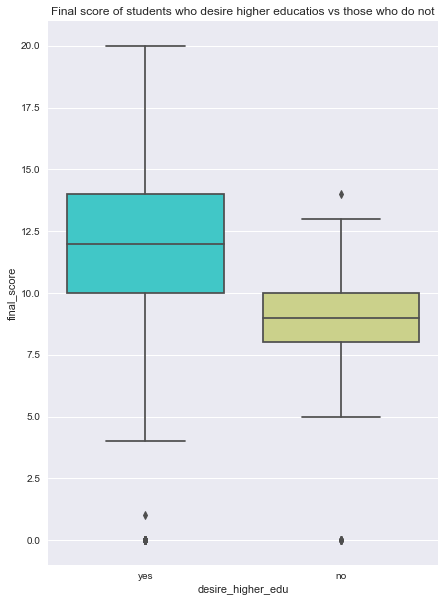

In [112]:
plt.figure(figsize=(7,10))
plt.title("Final score of students who desire higher educatios vs those who do not")
sns.boxplot(y="final_score", x="desire_higher_edu", data = student_df, palette = "rainbow");
#plt.savefig('images/final_who_do_dont')

There is very significant trend here. This seems to be very important feature in predicting academic success.

Students who desire to go for higher education perform better in high-school finals.

## Going out with Friends

Socializing is a very important part of high school life.There are many benifits of having healthy friendly relationship that go well beyond student life.It helps overcome social anxiety, improve communication skills, and improve mental and social wellbeing.

As my target is academic performance, I will analyse the impact of going out with friends on `final_score`.

`go_out` column in the dataset indicates the frequency of going out with friends.It ranges from 1 - very low to 5 - very high.

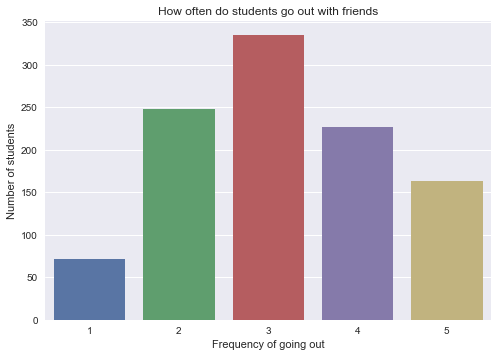

In [113]:
#frequency distribution of going out
tmp_plt = sns.countplot(x = 'go_out', data = student_df)
tmp_plt.axes.set_title('How often do students go out with friends')
tmp_plt.set_xlabel('Frequency of going out')
tmp_plt.set_ylabel('Number of students')
#plt.savefig('images/often_go_out')
plt.show()

I see that most students lie in the middle of this distribution which means that most students go out in moderation.Let's see the effect of going out on `final_score`:

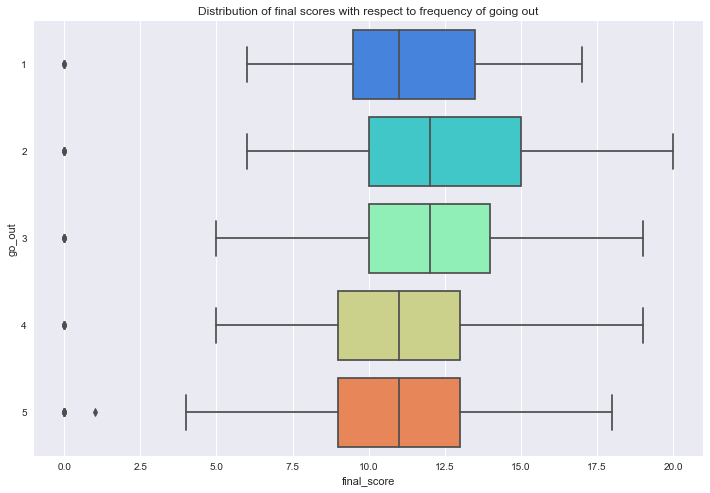

In [114]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to frequency of going out")
sns.boxplot(y="go_out", x="final_score", orient='h', data = student_df, palette = "rainbow")
#plt.savefig('images/dist_final_frequency_go_out')
plt.show()

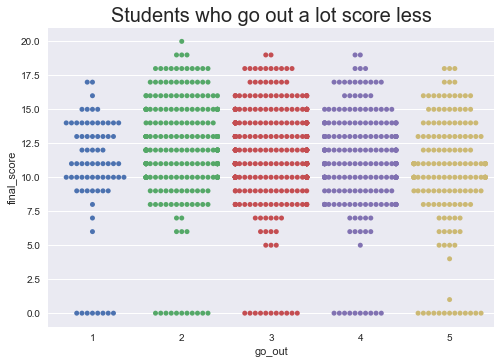

In [115]:
sns.swarmplot(x='go_out', y='final_score', data = student_df)
plt.title('Students who go out a lot score less', fontsize=20)
#plt.savefig('images/student_go_out_score_less')
plt.show()

There seems to be a slightly downward trend on the graphs especially for students who go out very frequently.

Students who tend to go out moderately seem to perform the best.There are many studies which indicate that prosocial behaviour is a critical component of academic success(Source:[DeVeries et al.,2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5994475/)).

## Absentism

I think it's fair to expect that students who are more absent in school generally perform poorly in exams.This is why many schools have strict attendance requirements.

Let's study the impact of absentism on `final_score` in our dataset.

`absences` is a numarical column that indicates number of school absences.

In [116]:
student_df['absences'].describe()

count    1044.000000
mean        4.434866
std         6.210017
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64

I see that absences are between the range of 0 and 75.Let's look at it's distribution.

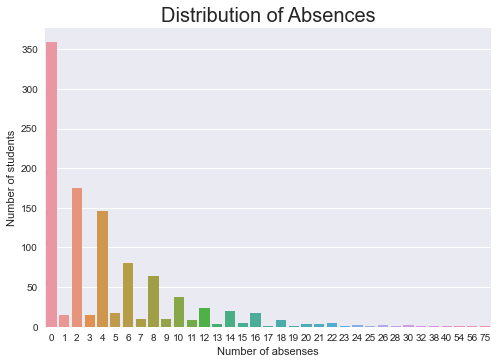

In [118]:
# absence distribution
tmp_plt = sns.countplot(x = 'absences', data = student_df)
tmp_plt.axes.set_title('Distribution of Absences', fontsize=20)
tmp_plt.set_xlabel('Number of absenses')
tmp_plt.set_ylabel('Number of students')
#plt.savefig('images/dist_absences')
plt.show()

The graph shows that most of the students are very regular to the classes and there are only a few students that are very irregular to school.Let's see the impact of number of absences to final score of the student.

Correlation Coefficient of absences with final_score -0.04567057698837366


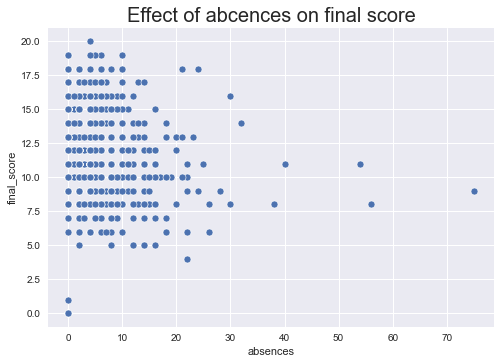

In [119]:
print('Correlation Coefficient of absences with final_score', student_df['absences'].corr(student_df['final_score']))
sns.scatterplot(x='absences', y='final_score', data = student_df)
plt.title('Effect of abcences on final score', fontsize=20)
#plt.savefig('images/effect_of_abcenses_final')
plt.show()

There seems to be a negligible negative correlation between the two columns.

The lack of a clear tend may be due to the fact that I don't have a lot of students that are irregular in school.But for now, I don't see a clear relationship between attendance regularity and final grade. 

## Romantic Relationship

This is very interesting sunject to study:'Effect of Romantic relationship on academic success of high-school students'.

High school relationship have a tendency to be volatile and can end up causing alot of stress for a teenager as they are not fully mature to deal with emotional aspects of a relationship.

At the same time, it is seen that being in healthy relationships helps with mood regulation and overall mental illness.

`romantic` column in this dataset indicates whether a student is in relationship(`yes`) or not (`no`).

Let's start by looking at the frequency distribution: 

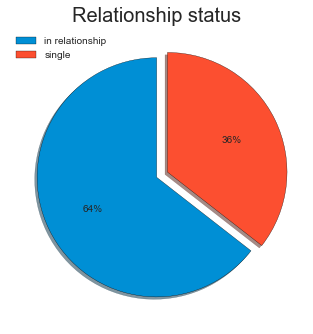

In [120]:
# Draw Pie-Chart of frequency distribution for internet access
plt.style.use('seaborn')
total_relationship = student_df['romantic'].value_counts().to_frame().T
labels = 'in relationship', 'single'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_relationship.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Relationship status', fontsize = 20)
#plt.savefig('images/relationship_status')
plt.show()

Approximately 64% of the students in this dataset are in a relationship.Let's now look at its impact on their final score:

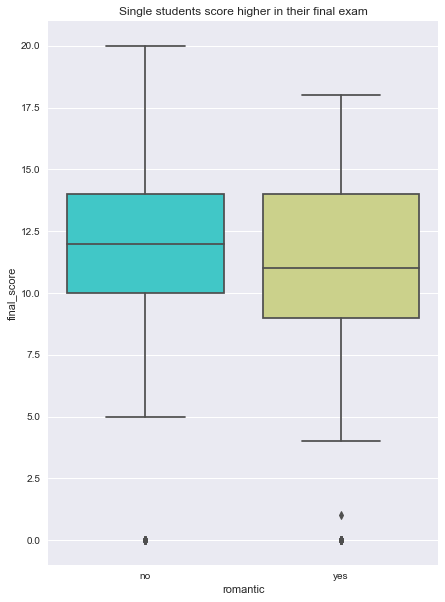

In [121]:
plt.figure(figsize=(7,10))
plt.title("Single students score higher in their final exam")
sns.boxplot(y="final_score", x='romantic', data = student_df, palette = "rainbow")
#plt.savefig('images/single_student_higher_final')
plt.show()

The boxplot indicates that single students perform better in their exams. Let's check this hypothesis using two-tailed t-test.

In [122]:
single_student_scores = student_df[student_df['romantic'] == 'no']['final_score'].values
in_rel_student_scores = student_df[student_df['romantic'] == 'yes']['final_score'].values

In [123]:
# Running a two-tailded t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value, p_value = scipy.stats.ttest_ind(single_student_scores, in_rel_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test id %f'%p_value)

Test statistic is 3.190633
p-value for two tailed test id 0.001462


In [124]:
alpha = 0.05
#testing for significance
if p_value<=alpha:
    print('Difference between single and in-relationship final scores is statistacally significant')
else:
    print('Difference between single and in-relationship final scores is not statistically significant')

Difference between single and in-relationship final scores is statistacally significant


I have established that romantic relationsship tend to negatively affect student performance.This could be due to the fact that tenagers in love would prefer to spend time each other over studying.

Now, let's try to analyze this trend further.Let's see if this effect is more profound for one gerder over other:

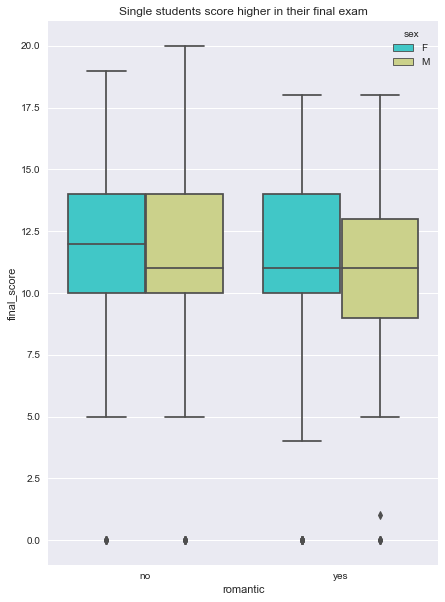

In [125]:
plt.figure(figsize=(7,10))
plt.title("Single students score higher in their final exam")
sns.boxplot(y="final_score", x="romantic", hue="sex", data = student_df, palette = "rainbow")
#plt.savefig('images/single_f_m_higher_final')
plt.show()

In [126]:
student_df.groupby(["sex", "romantic"])['final_score'].mean()

sex  romantic
F    no          11.836158
     yes         10.869198
M    no          11.388715
     yes         10.761194
Name: final_score, dtype: float64

Both the genders seem to be effected by relationships.The effect seems to be higher on females.This is also found in literature as well([Zayed,2016](https://www.researchgate.net/publication/353193236_Romantic_relationships_effects_academically_and_psychologically)).

Let's see if relationship status impact studying time:

In [127]:
student_df[student_df['romantic']=='no']['new_study_time'].value_counts()

2 to 5 hours     314
<2 hours         222
5 to 10 hours     88
>10 hours         49
Name: new_study_time, dtype: int64

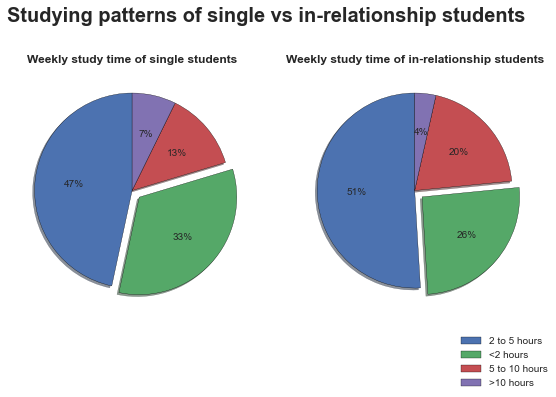

In [128]:
# Draw pie charts to see frequency distribution of internet access for rural and urban areas

plt.style.use('seaborn')

single_study_time = student_df[student_df['romantic']=='no']['new_study_time'].value_counts().to_frame().T
in_relationship_study_time = student_df[student_df['romantic']=='yes']['new_study_time'].value_counts().to_frame().T
                                        
labels = ['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours']
#colors = ['#008fd5', '#fc4f30']
                                        
                                        
fig, ax = plt.subplots(nrows=1, ncols=2)
                                        
explode = (0, 0.1,0,0)

plt.tight_layout()
ax[0].pie(single_study_time.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Weekly study time of single students', fontweight='bold')

ax[1].pie(in_relationship_study_time.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Weekly study time of in-relationship students', fontweight='bold')

fig.legend(labels=labels, loc='lower right',fontsize='medium')
plt.suptitle('Studying patterns of single vs in-relationship students', fontsize=20, fontweight='bold')
#plt.savefig('images/weekly_study_single_inrel')
plt.show()

This seems to be quite mixed.While the students who study the most are single, the students who seem to study the least are also single.

## Alcohol Consumption

Now let's look at teen alcohol consumption.

Considering that it is illegal in US to drink below 21 years of age, it is surpising to know that nearly 50% of all high school students drink alcohol.Excesive consumption of alcohol in people below 21 years of age is considered to be responsible for approximately 4,300 deaths every year from 2006 - 2010([Esser et al.,2016](https://www.cdc.gov/mmwr/volumes/66/wr/mm6618a4.htm)).

Studies also indicate there has been a rise in [binge drinking](https://www.cdc.gov/alcohol/fact-sheets/binge-drinking.htm) among high-schoolers, which means that when students drink they end up drinking a lot of alcohol.This is even more dangerous than regular alcohol usage.

it is clear that teenage drinking is a major health concern in US and while we have seen some improvements over the years([Esser et al.,2016](https://www.cdc.gov/mmwr/volumes/66/wr/mm6618a4.htm)), more needs to be done to mitigate this situation.

In this analysis, I will focus on the impact of alcohol consumption on academic performance.

Studies indicate that increase in alchohol consumption leads to poorer academic performance([Balsa et al.,2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3026599/),[Ansari et al.,2013](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/)).

Let's see if this dataset shows similar trend. Two columns in dataset will be our prime focus:

 - `weekday_alcohol_usage`: workday alcohol consumption (from 1 -very low to 5 -very high)
 - `weekend_alcohol_usage`: workend alcohol consumption (from 1 -very low to 5 -very high)
 
Now let's see at the frequency distribution of alcohol consumption between weekdays and weekends.

In [129]:
student_df['weekend_alcohol_usage'].value_counts()

1    398
2    235
3    200
4    138
5     73
Name: weekend_alcohol_usage, dtype: int64

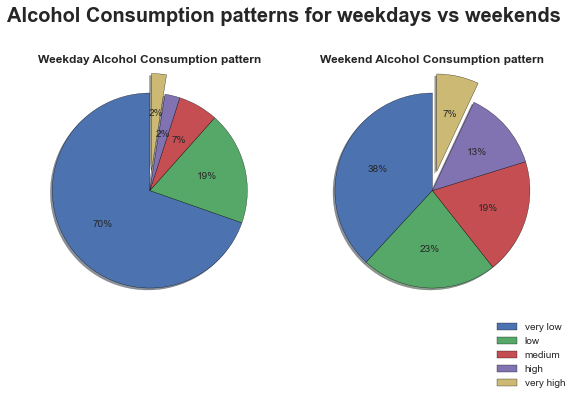

In [130]:
# Draw pie charts to see frequency distribution of alcohol consumption for weekdays and weekends

plt.style.use('seaborn')

weekday_alcohol_consumption = student_df['weekday_alcohol_usage'].value_counts().to_frame().T
weekend_alcohol_consumption = student_df['weekend_alcohol_usage'].value_counts().to_frame().T

labels = ['very low', 'low', 'medium', 'high', 'very high']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0, 0,0,0,0.2)

plt.tight_layout()
ax[0].pie(weekday_alcohol_consumption.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Weekday Alcohol Consumption pattern', fontweight='bold')

ax[1].pie(weekend_alcohol_consumption.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Weekend Alcohol Consumption pattern', fontweight='bold')

fig.legend(labels=labels, loc='lower right',fontsize='medium')
plt.suptitle('Alcohol Consumption patterns for weekdays vs weekends', fontsize=20, fontweight='bold')
#plt.savefig('images/alcohol_consumption_weekday_weekend')
plt.show()

It's good to see that 70% of the student drink very low alcohol on weekdays.As expected alcohol usage increases over the weekend.Let's now look at the impact of alcohol consumption on academic performance.

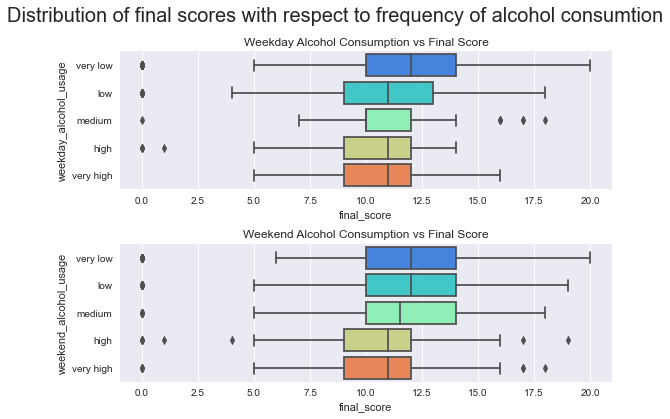

In [131]:
fig, ax = plt.subplots(nrows=2, ncols=1)
b1 = sns.boxplot(y="weekday_alcohol_usage", x="final_score", orient='h', data = student_df, palette = 'rainbow', ax=ax[0])
b1.set_title("Weekday Alcohol Consumption vs Final Score")
b1.set_yticklabels(['very low', 'low', 'medium', 'high', 'very high'])

b2 = sns.boxplot(y="weekend_alcohol_usage", x="final_score", orient='h', data = student_df, palette = 'rainbow', ax=ax[1])
b2.set_title("Weekend Alcohol Consumption vs Final Score")
b2.set_yticklabels(['very low', 'low', 'medium', 'high', 'very high'])

plt.tight_layout()


plt.suptitle("Distribution of final scores with respect to frequency of alcohol consumtion", fontsize=20, y=1.05)
#plt.savefig('images/dist_final_frequency_consumption')
plt.show()

In both the cases, I see that alcohol consumption leads to decline in `final_score`.Let's run a hypothesis test using ANOVA to check for significance of this effect.I will first look at weekend drinking.

In [132]:
very_low_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==1].final_score
low_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==2].final_score
medium_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==3].final_score
high_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==4].final_score
very_high_weekend_drinking = student_df[student_df['weekend_alcohol_usage']==5].final_score

I will run a [One-Way ANOVA test](https://www.simplypsychology.org/anova.html) to check if there exists a statistically signisignificant difference between the mean score of different alcohol consumption pattern.

In [133]:
# Running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value, p_value = scipy.stats.f_oneway(very_low_weekend_drinking, low_weekend_drinking, medium_weekend_drinking, high_weekend_drinking, very_high_weekend_drinking)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for ANOVA test is %f'%p_value)

Test statistic is 3.780943
p-value for ANOVA test is 0.004641


In [134]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between final scores for different alcohol consumption patterns over the weekend is statistically significant')
else:
    print('Difference between final scores for different alcohol consumption patterns over the weekend is not statistically significant')

Difference between final scores for different alcohol consumption patterns over the weekend is statistically significant


In [135]:
pd.DataFrame({'Weekend Alcohol Usage':['very low', 'low', 'medium', 'high', 'very high'],
    'Avarage Final Score':student_df.groupby('weekend_alcohol_usage').mean()['final_score'].values
             })

,Weekend Alcohol Usage,Avarage Final Score
0,very low,11.743719
1,low,11.472340
2,medium,11.290000
3,high,10.536232
4,very high,10.397260


So, increase in weekend alcohol consumption has a significant nagetive impact on final score.Let's test the same for weekday alcohol consumption as well.

In [136]:
very_low_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==1].final_score
low_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==2].final_score
medium_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==3].final_score
high_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==4].final_score
very_high_weekday_drinking = student_df[student_df['weekday_alcohol_usage']==5].final_score

In [137]:
# Running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value, p_value = scipy.stats.f_oneway(very_low_weekday_drinking, low_weekday_drinking, medium_weekday_drinking, high_weekday_drinking, very_high_weekday_drinking)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for ANOVA test is %f'%p_value)

Test statistic is 6.241569
p-value for ANOVA test is 0.000058


In [138]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between final scores for different alcohol consumption patterns over the weekday is statistically significant')
else:
    print('Difference between final scores for different alcohol consumption patterns over the weekday is not statistically significant')

Difference between final scores for different alcohol consumption patterns over the weekday is statistically significant


In [139]:
pd.DataFrame({'Weekday Alcohol Usage':['very low', 'low', 'medium', 'high', 'very high'],
    'Avarage Final Score':student_df.groupby('weekday_alcohol_usage').mean()['final_score'].values
             })

,Weekday Alcohol Usage,Avarage Final Score
0,very low,11.704264
1,low,10.556122
2,medium,10.898551
3,high,9.269231
4,very high,10.384615


I see an even more significant negative impact of increase in alchocol consumption on final score when done during workdays.

There is also an inconsistency here that the mean final score is higher for `very high` alcohol consumption compared to `high consumption` on weekdays. This could be due to the very low number of students who consume `very high` alcohol during weekdays.

Nevertheless, the trend is very clear.Increasing alcohol consumption among high school students will lead to decreace in academic performance.

## Parent's Education

Many studies indicate that parent;s education levels have critical impact on a child's academic and long-term career success.([Dubow et al.,2009](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2853053/))

Educated parents can often help students with their studies and also help instill studying discipline in their children.They are also better equipped to deal with school curricullum and help guide their children to their chosen careers([Source](https://degree.lamar.edu/articles/undergraduate/parents-education-level-and-childrens-success/)).

Many schools woldwide consider parent's education as an important criteria while admitting a student into their programs. I will now run an analysis on this dataset to see if this criteria holds any merit or is based on archaic idead of student success.

There are two columns related to parent's education in this dataset:

 - `mother_education`: 0 - none, 1 - primary education(4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education 
 
 - `father_education`: 0 - none, 1 - primary education(4th grade), 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education
 
 Let's first look at the distribution of education for both mothers and fathers.

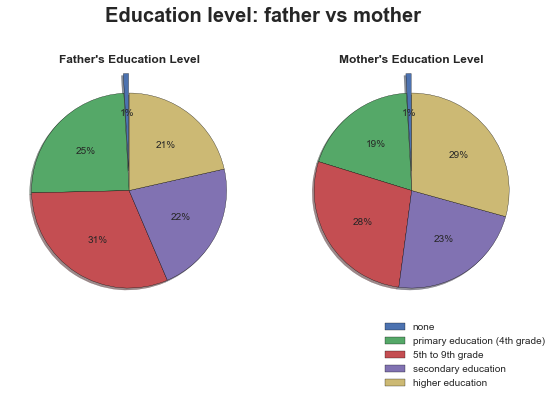

In [140]:
# Draw pie charts to see frequency distribution of fathers and mothers

plt.style.use('seaborn')

father_edu = student_df['father_education'].value_counts().sort_index().to_frame().T
mother_edu = student_df['mother_education'].value_counts().sort_index().to_frame().T

labels = ['none','primary education (4th grade)','5th to 9th grade','secondary education','higher education']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0.2, 0,0,0,0)

plt.tight_layout()
ax[0].pie(father_edu.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title("Father's Education Level", fontweight='bold')

ax[1].pie(mother_edu.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title("Mother's Education Level", fontweight='bold')

fig.legend(labels=labels, loc='lower right',fontsize='medium')
plt.suptitle('Education level: father vs mother', fontsize=20, fontweight='bold')
#plt.savefig('images/edu_level_father_mother')
plt.show()

The none values indicate no education seem to be very low in number.These could be rows for which I have no info about parent's education or the students are orphans. I will ignore these values for our further analysis.

I see that overall mothers seem to have better education than fathers.Let's look at the impact of parent's education on final score:

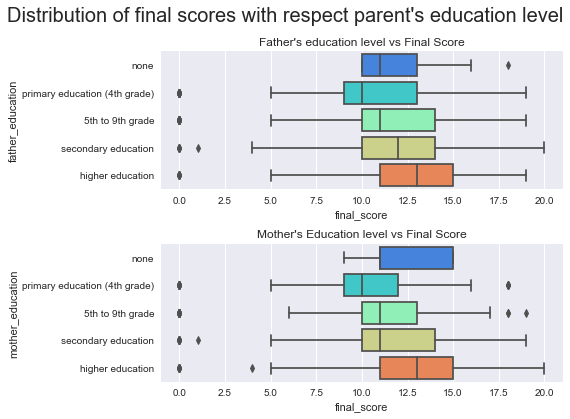

In [141]:
fig, ax = plt.subplots(nrows=2, ncols=1)
b1 = sns.boxplot(y="father_education", x="final_score", orient='h',data = student_df, palette = 'rainbow',ax=ax[0])
b1.set_title("Father's education level vs Final Score")
b1.set_yticklabels(['none','primary education (4th grade)','5th to 9th grade','secondary education','higher education'])

b2 = sns.boxplot(y="mother_education", x="final_score", orient='h',data = student_df, palette = 'rainbow',ax=ax[1])
b2.set_title("Mother's Education level vs Final Score")
b2.set_yticklabels(['none','primary education (4th grade)','5th to 9th grade','secondary education','higher education'])

plt.tight_layout()


plt.suptitle("Distribution of final scores with respect parent's education level",fontsize=20,y=1.05)
#plt.savefig('images/dist_final_parent_edu_level')
plt.show()

It can be seen that for both parents, having better education will lead to better academic success for the student.

Interestingly, this effect seems to be more profound for fathers.This is consistent with literature that suggests that father's education level is very strong factor for child's success at school([Source](https://www.theguardian.com/society/2014/sep/23/fathers-education-child-success-school)).

## Family Quality

[Anna J Egalite](https://www.educationnext.org/how-family-background-influences-student-achievement/) covered the impact family background can have on a student's academic success.While factors are equally important, the family that you are born into, the socio-economic factors, the home environment and your parents support does impact your life very significantly.

In this dataset, I have column called `family_quality` which I will use to analze impact of family quality on a student's grade.It captures the quality of family relationships, going from 1(very bad) to 5(excellent).

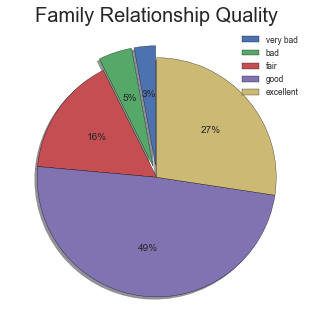

In [142]:
# Draw Pie-Chart of frequency distribution for family relationship quality

plt.style.use('seaborn')

family_relationship = student_df['family_quality'].value_counts().sort_index().to_frame().T
labels = 'very bad', 'bad', 'fair', 'good', 'excellent'
colors = ['#008fd5', '#fc4f30']
explode = (0.1, 0.1, 0, 0, 0)

plt.tight_layout()
plt.pie(family_relationship.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='small')
plt.title('Family Relationship Quality', fontsize = 20)
#plt.savefig('images/family_rel_quality')
plt.show()

This variable was recorded through surveys filled by students themselves.It is refreshing to see that only 8% students feel that they have a bad/very bad family situation.More than 75% of the student rated their family relationship quality as good as or excellent.

Let's now see the impact of family quality on final score:

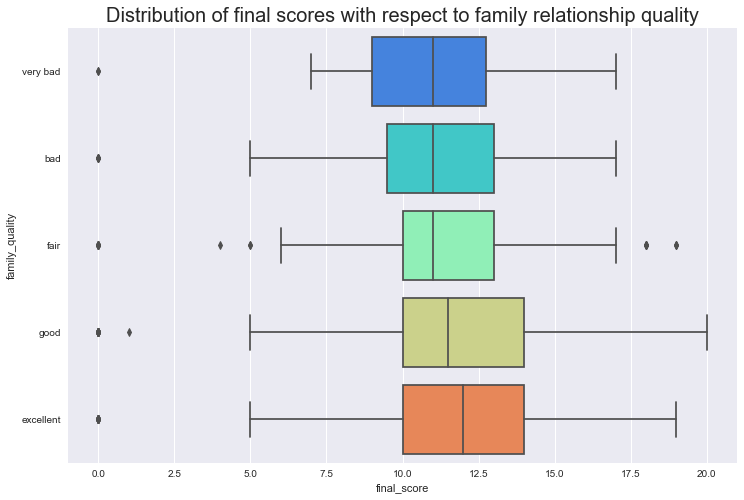

In [143]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to family relationship quality", fontsize=20)
plot = sns.boxplot(y="family_quality", x="final_score", orient='h', data = student_df, palette = 'rainbow')
plot.set_yticklabels(labels)
#plt.savefig('images/dist_final_family_rel_quality')
plt.show()

I see a consistent linear trend here.As quality of family relationship increase, a student's final score increases as well.

Let's look at a factor that might impact the quality of family relationship - `parent status`.This column contains information on parent's cohabitation status (**"T" -living together or "A" -apart**).

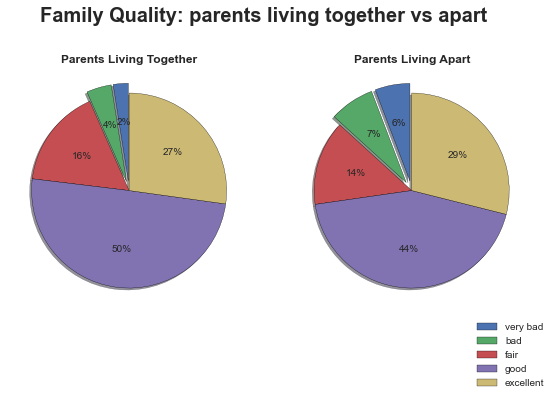

In [144]:
# Draw pie charts to see frequency distribution of parent status

plt.style.use('seaborn')

parents_living_together = student_df[student_df['parent_status']=='T']['family_quality'].value_counts().sort_index().to_frame().T
parents_living_apart = student_df[student_df['parent_status']=='A']['family_quality'].value_counts().sort_index().to_frame().T

labels = 'very bad', 'bad', 'fair', 'good', 'excellent'

explode = (0.1, 0.1, 0, 0, 0)

fig, ax = plt.subplots(nrows=1, ncols=2)

plt.tight_layout()
ax[0].pie(parents_living_together.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title("Parents Living Together", fontweight='bold')

ax[1].pie(parents_living_apart.iloc[0], startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title("Parents Living Apart", fontweight='bold')

fig.legend(labels=labels, loc='lower right',fontsize='medium')
plt.suptitle('Family Quality: parents living together vs apart', fontsize=20, fontweight='bold')
#plt.savefig('images/pie_parent_live_together_vs_apart')
plt.show()

I see that in this dataset, the quality of family relationship is reduced when parents live apart.

## Important Insights from EDA

 1. Student age or gender do not affect academic grade.
 2. Increasing study time improves final results.
 3. Increased alcohol consumption decreaces final results.
 4. Relationships do impact students' academic score.
 5. Family plays a major role in child's academic success whether it is parent's education or their relationship status.
 6. Parents should look for a school closer to their home as increased commute time affects academic performance negatively.

## Modeling

## Preparing dataset for Machine Learning

Now, I will prepare our dataset for machine learning. I have already cleaned our dataset and removed filler values.

I now need to handle all the categorical columns and do some feature engineering.

As the target variable is continuous, this will be a regression task. I will evaluate our models using commonly used accuracy metrics like [R-squared or coefficient of determination](https://www.investopedia.com/terms/r/r-squared.asp), [RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/) and [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error).

While discussing the target variable final_score during EDA, we discussed the case of many zero values. I showed that there could be multiple reasons for it and there is no clarification from the authors of this dataset on what exactly does the zero final score represent for each row.

This is why I chose to consider them as outliers and remove them from the dataset.

In [145]:
# removing all rows where final score is 0
student_df = student_df[student_df['final_score']!=0]
print(len(student_df))

991


So, the new dataset now has 991 rows and no students with zero score.

In [146]:
# splitting the data into features (X) and target variable(y)
X = student_df.copy()

#dropping both the irrelevant columns and the target variable
X = X.drop(['new_study_time','final_score'], axis=1)
y = student_df['final_score']

All ordinal variables in the dataset are already encoded. All nominal categorical variables in the data are of object type. I can directly call `pandas.get_dummmies` to convert them into one-hot encoded columns suitable for machine learning.

In [147]:
# setting drop_first = True to decrease dimensionality and remove one filler column
X = pd.get_dummies(X, drop_first=True)
X

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,guardian_mother,guardian_other,school_support_yes,family_support_yes,paid_classes_yes,activities_yes,nursery_yes,desire_higher_edu_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
1040,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
1041,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
1042,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


I have a total of 41 columns and 991 data points in our X.

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

Now I will split the dataset into two parts: a training dataset and a testing dataset. 

I chose a 80-20 split and I will use sklearn's `train_test_split` function to do so.

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [150]:
X_train.head()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,guardian_mother,guardian_other,school_support_yes,family_support_yes,paid_classes_yes,activities_yes,nursery_yes,desire_higher_edu_yes,internet_yes,romantic_yes
910,0.142857,0.25,0.50,0.000000,0.000000,0.0,0.75,0.75,0.75,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
47,0.142857,1.00,0.75,0.000000,1.000000,0.0,0.75,0.25,0.25,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
517,0.000000,0.25,0.50,0.000000,0.333333,0.0,0.25,0.50,0.75,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
631,0.428571,0.50,0.25,0.333333,0.666667,0.0,0.75,0.75,0.75,0.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
19,0.142857,1.00,0.75,0.000000,0.000000,0.0,0.50,0.00,0.50,0.00,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [151]:
y_train.head()

951    11
47     20
555    11
670    11
19     10
Name: final_score, dtype: int64

In [152]:
print('Size of training data:',len(y_train))
print('Size of testing data:',len(y_test))

Size of training data: 792
Size of testing data: 199


## Baseline Model

The first step would be to build a naive model to get a baseline level of performance.The target then would be to build a model that does better than at least this model.

I will use Sklearn's `DummyRegressor` here with the `mean` strategy. This would only output the mean of the training data as it's prediction.Let's evaluate this model.

In [153]:
# create a dummy regressor
dummy_reg = DummyRegressor(strategy='mean')

# fit it on the training set
dummy_reg.fit(X_train, y_train)

# make predictions on the test set
y_pred = dummy_reg.predict(X_test)

# calculate root mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE for Dummy Regressor:", rmse)
print("MAE for Dummy Regressor:", mae)
print("R-Squared for Dummy Regressor:", r2)

RMSE for Dummy Regressor: 2.859872873921179
MAE for Dummy Regressor: 2.365324095223593
R-Squared for Dummy Regressor: -0.032955765537687975


As expected, this is a very bad model. A negative R-Squared means that this model is predicting worse than the mean of the test data. This will serve as our naive baseline.

Let's now jump to our first model. I will start things with a simple linear regression.

## Linear Regression

I will start with a [linear regression model](https://www.ibm.com/in-en/topics/linear-regression). There are a lot of variables that have clear statistical relationship with the target variable so I am expecting a good performance from this model. 

In [154]:
# create a linear regression model
lin_reg = LinearRegression()
# fit on the training data
lin_reg.fit(X_train, y_train)
# make predictions on the test set
y_pred = lin_reg.predict(X_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for Linear Regressor:", rmse)
print("MAE for Linear Regressor:", mae)
print("R-Squared for Linear Regressor:", r2)

RMSE for Linear Regressor: 0.8598858292632797
MAE for Linear Regressor: 0.6733399854361957
R-Squared for Linear Regressor: 0.9066165636896389


I see a fairly good performance even without any optimization on the linear regression model. This tells me that we have some really good features. 

Now I will do some [feature selection](https://en.wikipedia.org/wiki/Feature_selection). I will be using the [chi-square test](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests) to measure the dependence of the target variable on all the features. 

Then I will pick the k-best features from the lot. I will tune the value of k by runninng a grid search on all plausible values for k to find the optimal k. 

In [155]:
# to find optimal number of features to use in the model
# we are using chi-square test from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
from sklearn.feature_selection import SelectKBest, chi2

test_mses=[]

for i in range(1,len(X_train.columns)):
    # select k best features
    sk = SelectKBest(chi2, k=i)
    
    # filter only the k best features
    X_new = sk.fit_transform(X_train,y_train)
    X_new_test=sk.fit_transform(X_test,y_test)
    
    # fit linear regression on the k best features
    temp_lr = lin_reg.fit(X_new, y_train)
    
    # find mse on the test set
    temp_y_pred = temp_lr.predict(X_new_test)
    test_mse = mean_squared_error(y_test, temp_y_pred)
    
    # append mse to list
    test_mses.append(test_mse)

# value of k for which mse is lowest
optimal_k = np.argmin(test_mses) +1    

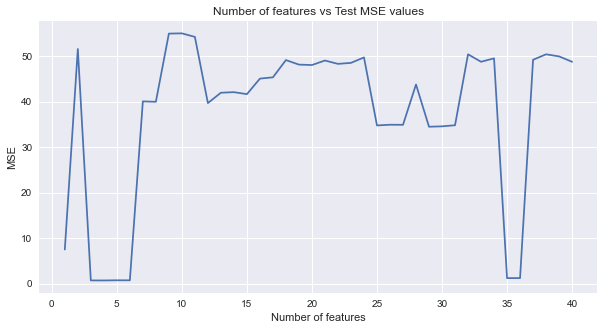

Optimal k: 4


In [157]:
# k vs mse
plt.figure(figsize=(10,5))
plt.plot(range(1,len(X_train.columns)), test_mses)
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.title('Number of features vs Test MSE values')
#plt.savefig('images/number_features_vs_test_MSE')
plt.show()
print('Optimal k:',optimal_k)

I will now use the optimal k for our final model.

In [158]:
# final model
sk = SelectKBest(chi2, k=optimal_k)
X_new = sk.fit_transform(X_train,y_train)
X_new_test=sk.fit_transform(X_test,y_test)

In [159]:
# create a linear regression model
lin_reg = LinearRegression()
# fit on the training data
lin_reg.fit(X_new, y_train)
# make predictions on the test set
y_pred = lin_reg.predict(X_new_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for Linear Regressor:", rmse)
print("MAE for Linear Regressor:", mae)
print("R-Squared for Linear Regressor:", r2)

RMSE for Linear Regressor: 0.8525840803275168
MAE for Linear Regressor: 0.681837184150793
R-Squared for Linear Regressor: 0.9081957672420428


I receive a strong R-Squared of 0.908. Let's look at the residual plots to evaluate model even further.

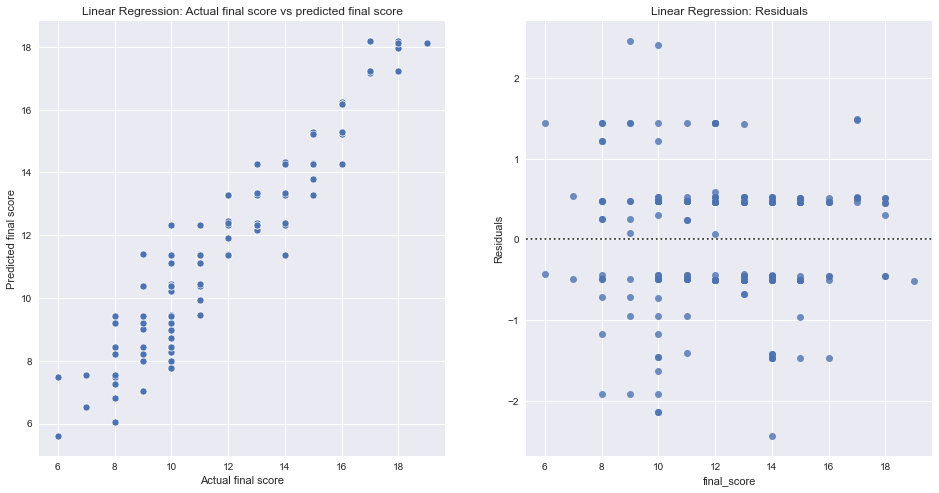

In [160]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('Linear Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('Linear Regression: Residuals')
b2.set_ylabel('Residuals')
#plt.savefig('images/Linear_regression')
plt.show()

The residual plots seem ideal. I am happy with this model. I will now move to more complex models. Let's try KNN.

## K-Nearest Neighbor

With knn, I will reuse the feature selection process, only the model being used will be a basic knn with 5 neighbors (arbitary choice for neighbors right now).

In [161]:
# finding optimal number of features to use in the model
# we are using chi-square test from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
knn_model = KNeighborsRegressor(n_neighbors=5)

test_mses=[]

for i in range(1,len(X_train.columns)):
    # select k best features
    sk = SelectKBest(chi2, k=i)
    
    # filter only the k best features
    X_new = sk.fit_transform(X_train,y_train)
    X_new_test=sk.fit_transform(X_test,y_test)
    
    # fit linear regression on the k best features
    temp_lr = knn_model.fit(X_new, y_train)
    
    # find mse on the test set
    temp_y_pred = temp_lr.predict(X_new_test)
    test_mse = mean_squared_error(y_test, temp_y_pred)
    
    # append mse to list
    test_mses.append(test_mse)

# number of features for which mse is lowest
optimal_num_features = np.argmin(test_mses) +1    

In [162]:
print('The optimal number of features for the knn model are',optimal_num_features)

The optimal number of features for the knn model are 4


In [163]:
# dataset to use
sk = SelectKBest(chi2, k=optimal_num_features)
X_new = sk.fit_transform(X_train,y_train)
X_new_test=sk.fit_transform(X_test,y_test)

Now I will optimize on a different k: the number of neighbors.

Let's run a grid search on k and find the optimal number of neighbors for the kNN model.

In [164]:
knn_mse = {}
# running a grid search for k between 1 and 50
for k in range(1,51):
    
    # defining a knn with k neighbors
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_new, y_train)
    y_pred = knn_model.predict(X_new_test)

    #Storing MSE 
    mse = mean_squared_error(y_test,y_pred)
    knn_mse[k] = mse

# value of k for which mse is lowest
optimal_k = np.argmin(list(knn_mse.values())) +1

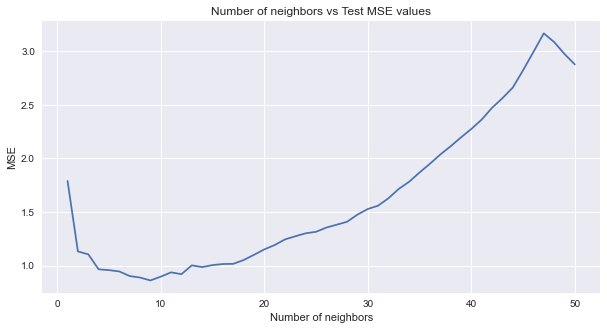

In [165]:
# k vs mse
plt.figure(figsize=(10,5))
plt.plot(knn_mse.keys(), knn_mse.values())
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
plt.title('Number of neighbors vs Test MSE values')
#plt.savefig('images/Number_of_neighbor_test_MSE')
plt.show()

Using the elbow method, I chose 8 as our k value. Now running our final knn model:

In [166]:
# create a knn regressor model
knn_model = KNeighborsRegressor(n_neighbors=8)
# fit on the training data
knn_model.fit(X_new, y_train)
# make predictions on the test set
y_pred = knn_model.predict(X_new_test)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for KNN Regressor:", rmse)
print("MAE for KNN Regressor:", mae)
print("R-Squared for KNN Regressor:", r2)

RMSE for KNN Regressor: 0.9426054450965303
MAE for KNN Regressor: 0.7173366834170855
R-Squared for KNN Regressor: 0.887785712691113


Again I receive a good R-Squared, slightly lower than linear regression though.

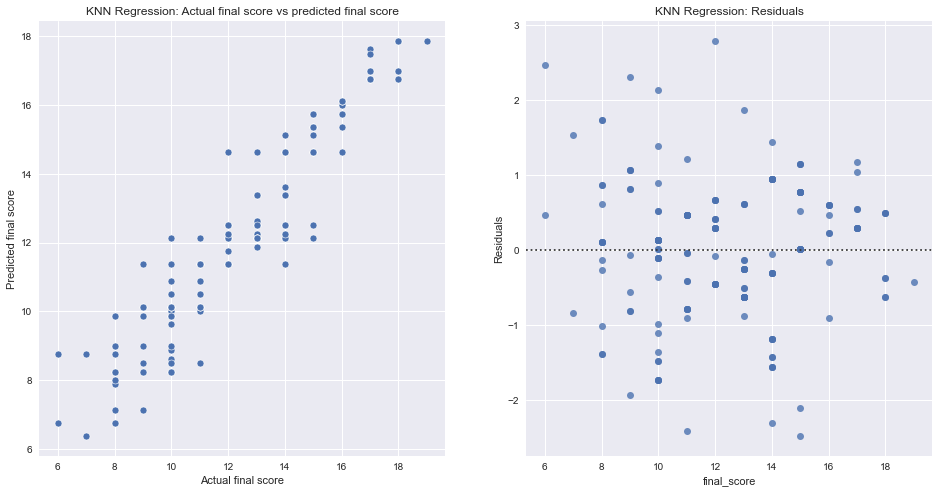

In [167]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('KNN Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('KNN Regression: Residuals')
b2.set_ylabel('Residuals')
#plt.savefig('images/KNN_regression')
plt.show()

## Feature Selection using Random Forest Model

I will now jump to tree models. But before that I will create a standard set of features to use for all the tree based models.

I will use random forest to select our features. This is because each tree of the random forest can calculate the importance of a feature according to its ability to increase the pureness of the leaves. This makes them excellent models for understanding feature importance.

Features that I select using random forest will now be used for all the remaining models

In [168]:
# First we build and train our Random Forest Model 
# adding an arbitrary amount of trees
# we need to have a good enough number of trees to model the dataset, but not too many
# adding max_depth to avoid overfitting
rf = RandomForestRegressor(max_depth=10, random_state=42, n_estimators = 100).fit(X_train, y_train)

# calculate feature importance
feature_importances = pd.DataFrame(rf.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances['cummulative_importance'] = feature_importances['importance'].cumsum()
feature_importances

,importance,cummulative_importance
period2_score,0.901942,0.901942
period1_score,0.012079,0.914022
absences,0.009044,0.923065
age,0.005706,0.928772
health,0.005128,0.933899
weekday_alcohol_usage,0.004852,0.938751
family_quality,0.004815,0.943566
go_out,0.004604,0.948170
free_time,0.004477,0.952647
commute_time,0.003902,0.956550


As `period1_score` and `period2_score` have undue advantage in predicting final_score, we will remove them while calculating feature importance and add them back later on

In [169]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor(max_depth=10, random_state=42, n_estimators = 100))

X_1 = X_train.drop(['period2_score','period1_score'],axis=1)
sel.fit(X_1, y_train)

selected_feat= list(X_1.columns[(sel.get_support())]) + ['period1_score', 'period2_score']

In [170]:
print('Final columns selected for use with tree-based models are:',selected_feat)

Final columns selected for use with tree-based models are: ['age', 'mother_education', 'father_education', 'study_time', 'failures', 'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alcohol_usage', 'health', 'absences', 'school_support_yes', 'paid_classes_yes', 'desire_higher_edu_yes', 'period1_score', 'period2_score']


In [171]:
# finalizing training and test set for tree based models
X_train_new = X_train[selected_feat]
X_test_new = X_test[selected_feat]

## Decision Tree Regsessor

I will run a decision tree regressor with the default setting, just to get an idea of the accuracy levels

In [172]:
# create a dTree regressor model
dTree = DecisionTreeRegressor(random_state=1)
# fit on the training data
dTree.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = dTree.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for dTree Regressor:", rmse)
print("MAE for dTree Regressor:", mae)
print("R-Squared for dTree Regressor:", r2)

RMSE for dTree Regressor: 1.205098048514171
MAE for dTree Regressor: 0.9095477386934674
R-Squared for dTree Regressor: 0.816585767226478


Not bad. Let's try hyperparameter optimization using grid search and see where we can take this model.

First we will define the grid.

In [173]:
# parameters for grid search dTree
param_dict = {
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [174]:
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_dict,verbose=1,scoring='r2',n_jobs=1)
grid_dtree.fit(X_train_new,y_train)
grid_dtree.best_params_

Fitting 5 folds for each of 4536 candidates, totalling 22680 fits


{'criterion': 'poisson',
 'max_depth': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

Now I will use these hyperparameters and fit the final dTree Model.

The best hyperparameters that we could find for Decision Tree from grid search are as follows:

  * `criterion`: 'squared_error',
  * `max_depth`: 4,
  * `min_samples_leaf`: 9
  * `min_samples_split`: 2

In [175]:
# create a dTree regressor model
dTree = DecisionTreeRegressor(criterion='squared_error',max_depth=4,min_samples_leaf=9,min_samples_split=2,random_state=1)
# fit on the training data
dTree.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = dTree.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for dTree Regressor:", rmse)
print("MAE for dTree Regressor:", mae)
print("R-Squared for dTree Regressor:", r2)

RMSE for dTree Regressor: 0.8351363771549553
MAE for dTree Regressor: 0.6794526992463412
R-Squared for dTree Regressor: 0.9119147746723426


I receive our best ever R-Squared so far of 0.91

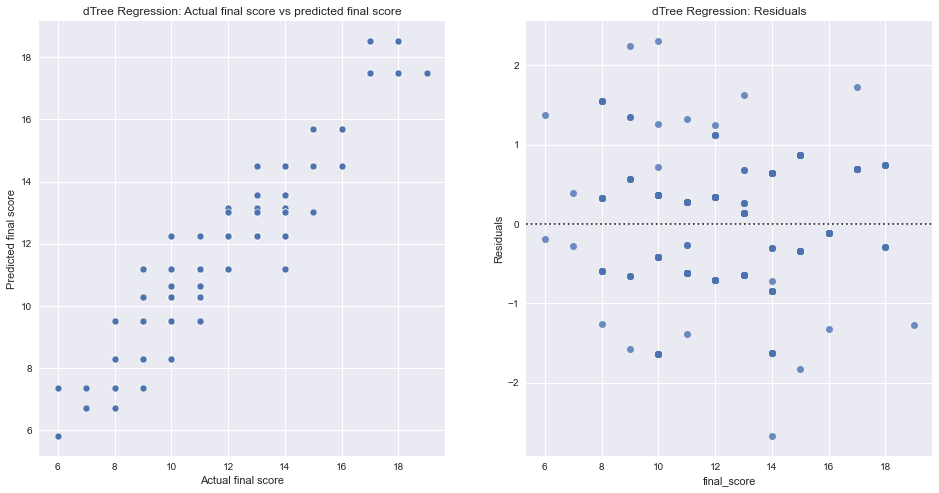

In [176]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('dTree Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('dTree Regression: Residuals')
b2.set_ylabel('Residuals')
#plt.savefig('images/Decision_tree')
plt.show()

I can also look at the importance of the features using the trained decision tree model. Let's look at the five most important features according to our decision tree model.

In [177]:
# Importance calculation
pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_new.columns).sort_values(by="Imp",ascending=False).head()

,Imp
period2_score,0.994800
period1_score,0.002296
health,0.001607
age,0.000702
failures,0.000595


Interestingly, number of failures seem to be an important factor as well.

## Random Forest Regressor

Now, I will use Random Forest to model our dataset. I will now optimize the hyper-parameters.

As Random Forest take considerable time to train, I will run a Randomized Search instead of a grid search for hyper-parameter tuning. Let's define the parameters that will be considered.

In [178]:
# parameters for grid search dTree
param_dict = {
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 30)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 80, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=20, random_state=42, n_jobs = 1,scoring='r2')
rf_random.fit(X_train_new, y_train)
print(rf_random.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5; 1/500] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 1/5; 1/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.905 total time=   0.9s
[CV 2/5; 1/500] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 2/5; 1/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.814 total time=   0.5s
[CV 3/5; 1/500] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 3/5; 1/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.911 total time=   0.4s
[CV 4/5; 1/500] START bootstrap=False, max_de

[CV 4/5; 6/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.913 total time=   0.2s
[CV 5/5; 6/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 6/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.841 total time=   0.2s
[CV 1/5; 7/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 1/5; 7/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.907 total time=   0.6s
[CV 2/5; 7/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200
[CV 2/5; 7/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, s

[CV 3/5; 12/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=260;, score=0.877 total time=   0.5s
[CV 4/5; 12/500] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=260
[CV 4/5; 12/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=260;, score=0.882 total time=   0.5s
[CV 5/5; 12/500] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=260
[CV 5/5; 12/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=260;, score=0.776 total time=   0.5s
[CV 1/5; 13/500] START bootstrap=False, max_depth=71, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 13/500] END bootstrap=False, max_depth=71, max_features=auto, min_samples_leaf=1, min_samples_split=2,

[CV 4/5; 18/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.858 total time=   0.0s
[CV 5/5; 18/500] START bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 5/5; 18/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.708 total time=   0.0s
[CV 1/5; 19/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=110
[CV 1/5; 19/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=110;, score=0.908 total time=   0.2s
[CV 2/5; 19/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=110
[CV 2/5; 19/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators

[CV 4/5; 24/500] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.907 total time=   0.0s
[CV 5/5; 24/500] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 24/500] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.825 total time=   0.0s
[CV 1/5; 25/500] START bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=190
[CV 1/5; 25/500] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=190;, score=0.896 total time=   0.2s
[CV 2/5; 25/500] START bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=190
[CV 2/5; 25/500] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

[CV 1/5; 36/500] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160;, score=0.904 total time=   0.2s
[CV 2/5; 36/500] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160
[CV 2/5; 36/500] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160;, score=0.812 total time=   0.1s
[CV 3/5; 36/500] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160
[CV 3/5; 36/500] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160;, score=0.912 total time=   0.1s
[CV 4/5; 36/500] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=160
[CV 4/5; 36/500] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_

[CV 4/5; 41/500] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.883 total time=   0.4s
[CV 5/5; 41/500] START bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200
[CV 5/5; 41/500] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.790 total time=   0.4s
[CV 1/5; 42/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10
[CV 1/5; 42/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.842 total time=   0.0s
[CV 2/5; 42/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10
[CV 2/5; 42/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=

[CV 4/5; 47/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.873 total time=   0.0s
[CV 5/5; 47/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 47/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.825 total time=   0.0s
[CV 1/5; 48/500] START bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 48/500] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.881 total time=   0.0s
[CV 2/5; 48/500] START bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 2/5; 48/500] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, 

[CV 4/5; 53/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.865 total time=   0.0s
[CV 5/5; 53/500] START bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 53/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.763 total time=   0.0s
[CV 1/5; 54/500] START bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 1/5; 54/500] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.898 total time=   0.4s
[CV 2/5; 54/500] START bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300
[CV 2/5; 54/500] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimat

[CV 4/5; 59/500] END bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.919 total time=   0.0s
[CV 5/5; 59/500] START bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 5/5; 59/500] END bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.842 total time=   0.0s
[CV 1/5; 60/500] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 60/500] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.902 total time=   0.3s
[CV 2/5; 60/500] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 60/500] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, 

[CV 3/5; 65/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=280;, score=0.916 total time=   0.5s
[CV 4/5; 65/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=280
[CV 4/5; 65/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=280;, score=0.923 total time=   0.8s
[CV 5/5; 65/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=280
[CV 5/5; 65/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=280;, score=0.842 total time=   0.6s
[CV 1/5; 66/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 1/5; 66/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 4/5; 71/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.873 total time=   0.0s
[CV 5/5; 71/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 5/5; 71/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.821 total time=   0.0s
[CV 1/5; 72/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 1/5; 72/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.901 total time=   0.0s
[CV 2/5; 72/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 2/5; 72/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, sco

[CV 2/5; 77/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230;, score=0.814 total time=   0.2s
[CV 3/5; 77/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230
[CV 3/5; 77/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230;, score=0.915 total time=   0.2s
[CV 4/5; 77/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230
[CV 4/5; 77/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230;, score=0.908 total time=   0.3s
[CV 5/5; 77/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230
[CV 5/5; 77/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimat

[CV 1/5; 83/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=260;, score=0.900 total time=   0.3s
[CV 2/5; 83/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=260
[CV 2/5; 83/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=260;, score=0.810 total time=   0.3s
[CV 3/5; 83/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=260
[CV 3/5; 83/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=260;, score=0.912 total time=   0.3s
[CV 4/5; 83/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=260
[CV 4/5; 83/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 5/5; 88/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.583 total time=   0.1s
[CV 1/5; 89/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110
[CV 1/5; 89/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110;, score=0.845 total time=   0.3s
[CV 2/5; 89/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110
[CV 2/5; 89/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110;, score=0.767 total time=   0.3s
[CV 3/5; 89/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110
[CV 3/5; 89/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimato

[CV 4/5; 94/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.920 total time=   0.3s
[CV 5/5; 94/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 94/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.800 total time=   0.3s
[CV 1/5; 95/500] START bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=210
[CV 1/5; 95/500] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=210;, score=0.875 total time=   0.4s
[CV 2/5; 95/500] START bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=210
[CV 2/5; 95/500] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 3/5; 100/500] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.909 total time=   0.3s
[CV 4/5; 100/500] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 4/5; 100/500] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.899 total time=   0.4s
[CV 5/5; 100/500] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 5/5; 100/500] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.843 total time=   0.3s
[CV 1/5; 101/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260
[CV 1/5; 101/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV 1/5; 106/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160;, score=0.869 total time=   0.3s
[CV 2/5; 106/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160
[CV 2/5; 106/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160;, score=0.785 total time=   0.3s
[CV 3/5; 106/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160
[CV 3/5; 106/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160;, score=0.877 total time=   0.3s
[CV 4/5; 106/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160
[CV 4/5; 106/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_

[CV 4/5; 111/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=0.846 total time=   0.3s
[CV 5/5; 111/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120
[CV 5/5; 111/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=120;, score=0.762 total time=   0.4s
[CV 1/5; 112/500] START bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/5; 112/500] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.904 total time=   0.0s
[CV 2/5; 112/500] START bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 112/500] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

[CV 2/5; 117/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.830 total time=   0.3s
[CV 3/5; 117/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 3/5; 117/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.915 total time=   0.4s
[CV 4/5; 117/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 4/5; 117/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.919 total time=   0.3s
[CV 5/5; 117/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200
[CV 5/5; 117/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_

[CV 1/5; 123/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.904 total time=   0.0s
[CV 2/5; 123/500] START bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 123/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.814 total time=   0.0s
[CV 3/5; 123/500] START bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 123/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.909 total time=   0.0s
[CV 4/5; 123/500] START bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 123/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estima

[CV 4/5; 128/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=260;, score=0.910 total time=   0.3s
[CV 5/5; 128/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=260
[CV 5/5; 128/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=260;, score=0.847 total time=   0.3s
[CV 1/5; 129/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 1/5; 129/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.901 total time=   0.4s
[CV 2/5; 129/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/5; 129/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_esti

[CV 3/5; 134/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120;, score=0.880 total time=   0.1s
[CV 4/5; 134/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120
[CV 4/5; 134/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120;, score=0.874 total time=   0.1s
[CV 5/5; 134/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120
[CV 5/5; 134/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120;, score=0.822 total time=   0.1s
[CV 1/5; 135/500] START bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 1/5; 135/500] END bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1

[CV 1/5; 140/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.844 total time=   0.6s
[CV 2/5; 140/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 140/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.766 total time=   0.5s
[CV 3/5; 140/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 140/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.863 total time=   0.5s
[CV 4/5; 140/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 4/5; 140/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 145/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.913 total time=   0.0s
[CV 5/5; 145/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 5/5; 145/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.831 total time=   0.0s
[CV 1/5; 146/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 146/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.898 total time=   0.0s
[CV 2/5; 146/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 146/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, 

[CV 2/5; 151/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.825 total time=   0.6s
[CV 3/5; 151/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 3/5; 151/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.914 total time=   0.7s
[CV 4/5; 151/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 4/5; 151/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.917 total time=   0.6s
[CV 5/5; 151/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300
[CV 5/5; 151/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spli

[CV 5/5; 156/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.585 total time=   0.1s
[CV 1/5; 157/500] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=170
[CV 1/5; 157/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=170;, score=0.899 total time=   0.1s
[CV 2/5; 157/500] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=170
[CV 2/5; 157/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=170;, score=0.807 total time=   0.1s
[CV 3/5; 157/500] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=170
[CV 3/5; 157/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_

[CV 3/5; 162/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260;, score=0.867 total time=   0.7s
[CV 4/5; 162/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260
[CV 4/5; 162/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260;, score=0.821 total time=   0.7s
[CV 5/5; 162/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260
[CV 5/5; 162/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260;, score=0.608 total time=   0.7s
[CV 1/5; 163/500] START bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=270
[CV 1/5; 163/500] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, 

[CV 1/5; 168/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=210;, score=0.901 total time=   0.2s
[CV 2/5; 168/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=210
[CV 2/5; 168/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=210;, score=0.809 total time=   0.2s
[CV 3/5; 168/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=210
[CV 3/5; 168/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=210;, score=0.914 total time=   0.2s
[CV 4/5; 168/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=210
[CV 4/5; 168/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_

[CV 5/5; 173/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=90;, score=0.839 total time=   0.1s
[CV 1/5; 174/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210
[CV 1/5; 174/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210;, score=0.907 total time=   0.3s
[CV 2/5; 174/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210
[CV 2/5; 174/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210;, score=0.811 total time=   0.3s
[CV 3/5; 174/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=210
[CV 3/5; 174/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_e

[CV 3/5; 179/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.912 total time=   0.3s
[CV 4/5; 179/500] START bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 4/5; 179/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.917 total time=   0.3s
[CV 5/5; 179/500] START bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 5/5; 179/500] END bootstrap=False, max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.845 total time=   0.3s
[CV 1/5; 180/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 180/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_es

[CV 1/5; 185/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=240;, score=0.899 total time=   0.2s
[CV 2/5; 185/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=240
[CV 2/5; 185/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=240;, score=0.810 total time=   0.3s
[CV 3/5; 185/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=240
[CV 3/5; 185/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=240;, score=0.910 total time=   0.6s
[CV 4/5; 185/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=240
[CV 4/5; 185/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 4/5; 190/500] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=110;, score=0.923 total time=   0.1s
[CV 5/5; 190/500] START bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=110
[CV 5/5; 190/500] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=110;, score=0.844 total time=   0.2s
[CV 1/5; 191/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 1/5; 191/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.885 total time=   0.0s
[CV 2/5; 191/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 191/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 2/5; 196/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=270;, score=0.789 total time=   0.9s
[CV 3/5; 196/500] START bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=270
[CV 3/5; 196/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=270;, score=0.883 total time=   0.6s
[CV 4/5; 196/500] START bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=270
[CV 4/5; 196/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=270;, score=0.883 total time=   0.6s
[CV 5/5; 196/500] START bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=270
[CV 5/5; 196/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 202/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.906 total time=   0.2s
[CV 2/5; 202/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 202/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.828 total time=   0.2s
[CV 3/5; 202/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 202/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.914 total time=   0.2s
[CV 4/5; 202/500] START bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 202/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 4/5; 207/500] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80;, score=0.916 total time=   0.0s
[CV 5/5; 207/500] START bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80
[CV 5/5; 207/500] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=80;, score=0.845 total time=   0.0s
[CV 1/5; 208/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 208/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.898 total time=   0.1s
[CV 2/5; 208/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 208/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n

[CV 3/5; 213/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.914 total time=   0.1s
[CV 4/5; 213/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 213/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.925 total time=   0.1s
[CV 5/5; 213/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 213/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.845 total time=   0.1s
[CV 1/5; 214/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=240
[CV 1/5; 214/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimato

[CV 2/5; 219/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.812 total time=   0.0s
[CV 3/5; 219/500] START bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 3/5; 219/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.909 total time=   0.0s
[CV 4/5; 219/500] START bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 4/5; 219/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.914 total time=   0.0s
[CV 5/5; 219/500] START bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 5/5; 219/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60

[CV 5/5; 224/500] END bootstrap=True, max_depth=63, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=140;, score=0.847 total time=   0.2s
[CV 1/5; 225/500] START bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 1/5; 225/500] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.907 total time=   0.2s
[CV 2/5; 225/500] START bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 225/500] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.828 total time=   0.2s
[CV 3/5; 225/500] START bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 225/500] END bootstrap=True, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 3/5; 230/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=190;, score=0.915 total time=   0.2s
[CV 4/5; 230/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=190
[CV 4/5; 230/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=190;, score=0.909 total time=   0.2s
[CV 5/5; 230/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=190
[CV 5/5; 230/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=190;, score=0.845 total time=   0.2s
[CV 1/5; 231/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 1/5; 231/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimato

[CV 2/5; 236/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.823 total time=   0.1s
[CV 3/5; 236/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 236/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.910 total time=   0.1s
[CV 4/5; 236/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 236/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.913 total time=   0.1s
[CV 5/5; 236/500] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 236/500] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70

[CV 5/5; 241/500] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.844 total time=   0.2s
[CV 1/5; 242/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 1/5; 242/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.866 total time=   0.2s
[CV 2/5; 242/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 2/5; 242/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.782 total time=   0.2s
[CV 3/5; 242/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200
[CV 3/5; 242/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV 3/5; 247/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=170;, score=0.912 total time=   0.2s
[CV 4/5; 247/500] START bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=170
[CV 4/5; 247/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=170;, score=0.912 total time=   0.2s
[CV 5/5; 247/500] START bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=170
[CV 5/5; 247/500] END bootstrap=True, max_depth=71, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=170;, score=0.851 total time=   0.2s
[CV 1/5; 248/500] START bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=240
[CV 1/5; 248/500] END bootstrap=True, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV 1/5; 253/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260;, score=0.860 total time=   0.6s
[CV 2/5; 253/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260
[CV 2/5; 253/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260;, score=0.787 total time=   0.7s
[CV 3/5; 253/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260
[CV 3/5; 253/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260;, score=0.880 total time=   0.7s
[CV 4/5; 253/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=260
[CV 4/5; 253/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=1, min_samples_split

[CV 5/5; 258/500] END bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.840 total time=   0.0s
[CV 1/5; 259/500] START bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140
[CV 1/5; 259/500] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140;, score=0.897 total time=   0.1s
[CV 2/5; 259/500] START bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140
[CV 2/5; 259/500] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140;, score=0.813 total time=   0.1s
[CV 3/5; 259/500] START bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=140
[CV 3/5; 259/500] END bootstrap=False, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=

[CV 3/5; 264/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=240;, score=0.880 total time=   0.5s
[CV 4/5; 264/500] START bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=240
[CV 4/5; 264/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=240;, score=0.846 total time=   0.5s
[CV 5/5; 264/500] START bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=240
[CV 5/5; 264/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=240;, score=0.762 total time=   0.5s
[CV 1/5; 265/500] START bootstrap=False, max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=270
[CV 1/5; 265/500] END bootstrap=False, max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=

[CV 1/5; 270/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120;, score=0.851 total time=   0.3s
[CV 2/5; 270/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120
[CV 2/5; 270/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120;, score=0.758 total time=   0.3s
[CV 3/5; 270/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120
[CV 3/5; 270/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120;, score=0.860 total time=   0.3s
[CV 4/5; 270/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=120
[CV 4/5; 270/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_

[CV 5/5; 275/500] END bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=90;, score=0.850 total time=   0.0s
[CV 1/5; 276/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 1/5; 276/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.860 total time=   0.3s
[CV 2/5; 276/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 2/5; 276/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.787 total time=   0.3s
[CV 3/5; 276/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 3/5; 276/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=1

[CV 3/5; 281/500] END bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.913 total time=   0.2s
[CV 4/5; 281/500] START bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 281/500] END bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.908 total time=   0.2s
[CV 5/5; 281/500] START bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 281/500] END bootstrap=True, max_depth=38, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.845 total time=   0.2s
[CV 1/5; 282/500] START bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 1/5; 282/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 2/5; 287/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.823 total time=   0.0s
[CV 3/5; 287/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 287/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.914 total time=   0.0s
[CV 4/5; 287/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 287/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.923 total time=   0.0s
[CV 5/5; 287/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 287/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50

[CV 1/5; 293/500] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.853 total time=   0.1s
[CV 2/5; 293/500] START bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 293/500] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.753 total time=   0.1s
[CV 3/5; 293/500] START bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 3/5; 293/500] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.860 total time=   0.1s
[CV 4/5; 293/500] START bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 4/5; 293/500] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 4/5; 298/500] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220;, score=0.897 total time=   0.2s
[CV 5/5; 298/500] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220
[CV 5/5; 298/500] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=220;, score=0.849 total time=   0.2s
[CV 1/5; 299/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 1/5; 299/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.904 total time=   0.2s
[CV 2/5; 299/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 2/5; 299/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV 2/5; 304/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=260;, score=0.826 total time=   0.5s
[CV 3/5; 304/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=260
[CV 3/5; 304/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=260;, score=0.913 total time=   0.5s
[CV 4/5; 304/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=260
[CV 4/5; 304/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=260;, score=0.923 total time=   0.5s
[CV 5/5; 304/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=260
[CV 5/5; 304/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 5/5; 309/500] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160;, score=0.841 total time=   0.3s
[CV 1/5; 310/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=190
[CV 1/5; 310/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=190;, score=0.906 total time=   0.3s
[CV 2/5; 310/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=190
[CV 2/5; 310/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=190;, score=0.814 total time=   0.2s
[CV 3/5; 310/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=190
[CV 3/5; 310/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_e

[CV 3/5; 315/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80;, score=0.914 total time=   0.1s
[CV 4/5; 315/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80
[CV 4/5; 315/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80;, score=0.925 total time=   0.1s
[CV 5/5; 315/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80
[CV 5/5; 315/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=80;, score=0.843 total time=   0.1s
[CV 1/5; 316/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=280
[CV 1/5; 316/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_

[CV 2/5; 321/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=0.806 total time=   0.1s
[CV 3/5; 321/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110
[CV 3/5; 321/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=0.910 total time=   0.1s
[CV 4/5; 321/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110
[CV 4/5; 321/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110;, score=0.916 total time=   0.1s
[CV 5/5; 321/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110
[CV 5/5; 321/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_

[CV 5/5; 326/500] END bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=170;, score=0.844 total time=   0.2s
[CV 1/5; 327/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 327/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.907 total time=   0.1s
[CV 2/5; 327/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 327/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.829 total time=   0.0s
[CV 3/5; 327/500] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 327/500] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, 

[CV 3/5; 332/500] END bootstrap=True, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.915 total time=   0.2s
[CV 4/5; 332/500] START bootstrap=True, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 4/5; 332/500] END bootstrap=True, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.924 total time=   0.2s
[CV 5/5; 332/500] START bootstrap=True, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 5/5; 332/500] END bootstrap=True, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.850 total time=   0.3s
[CV 1/5; 333/500] START bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=90
[CV 1/5; 333/500] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 1/5; 338/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.849 total time=   0.5s
[CV 2/5; 338/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 2/5; 338/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.771 total time=   0.6s
[CV 3/5; 338/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 3/5; 338/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.868 total time=   0.6s
[CV 4/5; 338/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200
[CV 4/5; 338/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_

[CV 4/5; 343/500] END bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=110;, score=0.918 total time=   0.1s
[CV 5/5; 343/500] START bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=110
[CV 5/5; 343/500] END bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=110;, score=0.837 total time=   0.1s
[CV 1/5; 344/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 344/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.901 total time=   0.2s
[CV 2/5; 344/500] START bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 344/500] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_esti

[CV 2/5; 349/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.818 total time=   0.2s
[CV 3/5; 349/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 349/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.913 total time=   0.2s
[CV 4/5; 349/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 349/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.919 total time=   0.4s
[CV 5/5; 349/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 349/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_

[CV 5/5; 354/500] END bootstrap=False, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=220;, score=0.762 total time=   0.6s
[CV 1/5; 355/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260
[CV 1/5; 355/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260;, score=0.901 total time=   0.6s
[CV 2/5; 355/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260
[CV 2/5; 355/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260;, score=0.828 total time=   0.6s
[CV 3/5; 355/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=260
[CV 3/5; 355/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estim

[CV 1/5; 361/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290;, score=0.869 total time=   0.7s
[CV 2/5; 361/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290
[CV 2/5; 361/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290;, score=0.785 total time=   0.7s
[CV 3/5; 361/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290
[CV 3/5; 361/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290;, score=0.877 total time=   0.7s
[CV 4/5; 361/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=290
[CV 4/5; 361/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 366/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160;, score=0.882 total time=   0.3s
[CV 5/5; 366/500] START bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160
[CV 5/5; 366/500] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=160;, score=0.777 total time=   0.3s
[CV 1/5; 367/500] START bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=90
[CV 1/5; 367/500] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=90;, score=0.902 total time=   0.0s
[CV 2/5; 367/500] START bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=90
[CV 2/5; 367/500] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 372/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.832 total time=   0.2s
[CV 3/5; 372/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 372/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.915 total time=   0.2s
[CV 4/5; 372/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 372/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.924 total time=   0.2s
[CV 5/5; 372/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 372/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150

[CV 5/5; 377/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.842 total time=   0.1s
[CV 1/5; 378/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80
[CV 1/5; 378/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.874 total time=   0.1s
[CV 2/5; 378/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80
[CV 2/5; 378/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80;, score=0.781 total time=   0.1s
[CV 3/5; 378/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=80
[CV 3/5; 378/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 383/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260;, score=0.888 total time=   0.3s
[CV 4/5; 383/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260
[CV 4/5; 383/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260;, score=0.875 total time=   0.3s
[CV 5/5; 383/500] START bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260
[CV 5/5; 383/500] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260;, score=0.827 total time=   0.3s
[CV 1/5; 384/500] START bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 1/5; 384/500] END bootstrap=False, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV 1/5; 389/500] END bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.904 total time=   0.8s
[CV 2/5; 389/500] START bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 2/5; 389/500] END bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.819 total time=   0.6s
[CV 3/5; 389/500] START bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 3/5; 389/500] END bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.911 total time=   0.7s
[CV 4/5; 389/500] START bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300
[CV 4/5; 389/500] END bootstrap=True, max_depth=71, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 2/5; 400/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=260;, score=0.814 total time=   0.4s
[CV 3/5; 400/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=260
[CV 3/5; 400/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=260;, score=0.912 total time=   0.4s
[CV 4/5; 400/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=260
[CV 4/5; 400/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=260;, score=0.910 total time=   0.3s
[CV 5/5; 400/500] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=260
[CV 5/5; 400/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 5/5; 405/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=210;, score=0.709 total time=   0.7s
[CV 1/5; 406/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220
[CV 1/5; 406/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220;, score=0.845 total time=   0.8s
[CV 2/5; 406/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220
[CV 2/5; 406/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220;, score=0.766 total time=   0.8s
[CV 3/5; 406/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220
[CV 3/5; 406/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 3/5; 411/500] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=170;, score=0.911 total time=   0.3s
[CV 4/5; 411/500] START bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=170
[CV 4/5; 411/500] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=170;, score=0.907 total time=   0.3s
[CV 5/5; 411/500] START bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=170
[CV 5/5; 411/500] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=170;, score=0.850 total time=   0.3s
[CV 1/5; 412/500] START bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=110
[CV 1/5; 412/500] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 1/5; 417/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.869 total time=   0.9s
[CV 2/5; 417/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300
[CV 2/5; 417/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.786 total time=   0.9s
[CV 3/5; 417/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300
[CV 3/5; 417/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.877 total time=   0.9s
[CV 4/5; 417/500] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300
[CV 4/5; 417/500] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_

[CV 4/5; 422/500] END bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=280;, score=0.913 total time=   0.4s
[CV 5/5; 422/500] START bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=280
[CV 5/5; 422/500] END bootstrap=False, max_depth=55, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=280;, score=0.844 total time=   0.4s
[CV 1/5; 423/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 1/5; 423/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.896 total time=   0.0s
[CV 2/5; 423/500] START bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 2/5; 423/500] END bootstrap=False, max_depth=71, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_est

[CV 2/5; 428/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.805 total time=   0.1s
[CV 3/5; 428/500] START bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130
[CV 3/5; 428/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.910 total time=   0.1s
[CV 4/5; 428/500] START bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130
[CV 4/5; 428/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.903 total time=   0.1s
[CV 5/5; 428/500] START bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130
[CV 5/5; 428/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_

[CV 5/5; 433/500] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.847 total time=   0.1s
[CV 1/5; 434/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 1/5; 434/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.858 total time=   0.0s
[CV 2/5; 434/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 2/5; 434/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.786 total time=   0.0s
[CV 3/5; 434/500] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10
[CV 3/5; 434/500] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_

[CV 4/5; 439/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90;, score=0.928 total time=   0.1s
[CV 5/5; 439/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90
[CV 5/5; 439/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=90;, score=0.853 total time=   0.1s
[CV 1/5; 440/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 440/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.909 total time=   0.0s
[CV 2/5; 440/500] START bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 440/500] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, scor

[CV 2/5; 445/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.808 total time=   0.2s
[CV 3/5; 445/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180
[CV 3/5; 445/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.912 total time=   0.2s
[CV 4/5; 445/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180
[CV 4/5; 445/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.913 total time=   0.2s
[CV 5/5; 445/500] START bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180
[CV 5/5; 445/500] END bootstrap=False, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split

[CV 5/5; 450/500] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.845 total time=   0.3s
[CV 1/5; 451/500] START bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 1/5; 451/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.849 total time=   0.1s
[CV 2/5; 451/500] START bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 451/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.771 total time=   0.1s
[CV 3/5; 451/500] START bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 3/5; 451/500] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estim

[CV 3/5; 456/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=90;, score=0.914 total time=   0.2s
[CV 4/5; 456/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=90
[CV 4/5; 456/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=90;, score=0.922 total time=   0.2s
[CV 5/5; 456/500] START bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=90
[CV 5/5; 456/500] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=90;, score=0.845 total time=   0.1s
[CV 1/5; 457/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=160
[CV 1/5; 457/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estim

[CV 1/5; 462/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260;, score=0.900 total time=   0.4s
[CV 2/5; 462/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260
[CV 2/5; 462/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260;, score=0.814 total time=   0.3s
[CV 3/5; 462/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260
[CV 3/5; 462/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260;, score=0.908 total time=   0.3s
[CV 4/5; 462/500] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=260
[CV 4/5; 462/500] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 4/5; 467/500] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.909 total time=   0.2s
[CV 5/5; 467/500] START bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 5/5; 467/500] END bootstrap=True, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.847 total time=   0.2s
[CV 1/5; 468/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 468/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.860 total time=   0.0s
[CV 2/5; 468/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 468/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV 3/5; 473/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.914 total time=   0.0s
[CV 4/5; 473/500] START bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 4/5; 473/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.904 total time=   0.0s
[CV 5/5; 473/500] START bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 5/5; 473/500] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.841 total time=   0.0s
[CV 1/5; 474/500] START bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=280
[CV 1/5; 474/500] END bootstrap=False, max_depth=63, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estim

[CV 1/5; 479/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=280;, score=0.869 total time=   0.7s
[CV 2/5; 479/500] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=280
[CV 2/5; 479/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=280;, score=0.786 total time=   0.7s
[CV 3/5; 479/500] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=280
[CV 3/5; 479/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=280;, score=0.877 total time=   0.7s
[CV 4/5; 479/500] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=280
[CV 4/5; 479/500] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_sampl

[CV 5/5; 484/500] END bootstrap=False, max_depth=38, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=120;, score=0.840 total time=   0.1s
[CV 1/5; 485/500] START bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 1/5; 485/500] END bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.906 total time=   0.4s
[CV 2/5; 485/500] START bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 2/5; 485/500] END bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.823 total time=   0.3s
[CV 3/5; 485/500] START bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 3/5; 485/500] END bootstrap=True, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 4/5; 490/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.877 total time=   0.0s
[CV 5/5; 490/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 5/5; 490/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.819 total time=   0.0s
[CV 1/5; 491/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 1/5; 491/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.854 total time=   0.0s
[CV 2/5; 491/500] START bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 491/500] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV 2/5; 496/500] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220;, score=0.826 total time=   0.6s
[CV 3/5; 496/500] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220
[CV 3/5; 496/500] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220;, score=0.912 total time=   0.5s
[CV 4/5; 496/500] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220
[CV 4/5; 496/500] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220;, score=0.917 total time=   0.5s
[CV 5/5; 496/500] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=220
[CV 5/5; 496/500] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimat

In [117]:
# create a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=90,
                                 max_depth=5,
                                 min_samples_leaf=4,
                                 min_samples_split=5,
                                 max_features='auto',
                                 bootstrap=True,
                                 random_state=1)
# fit on the training data
rf_model.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = rf_model.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for Random Forest Regressor:", rmse)
print("MAE for Random Forest Regressor:", mae)
print("R-Squared for Random Forest Regressor:", r2)

RMSE for Random Forest Regressor: 0.8125775380679985
MAE for Random Forest Regressor: 0.6502622099198602
R-Squared for Random Forest Regressor: 0.9166092474278689


I improve our R-Squared even further to 0.9167. Let's look at the residual plots:

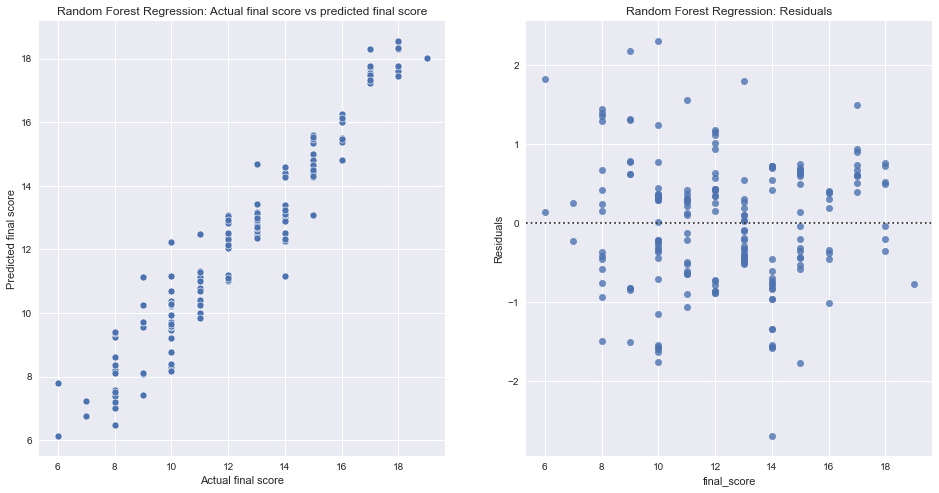

In [118]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('Random Forest Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('Random Forest Regression: Residuals')
b2.set_ylabel('Residuals')
plt.savefig('images/random_forest')
plt.show()

Five most important features according to the Random Forest model:

In [119]:
# Importance calculation for Random Forest
pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train_new.columns).sort_values(by="Imp",ascending=False).head()

,Imp
period2_score,0.970247
period1_score,0.007183
health,0.002956
absences,0.002771
go_out,0.002597


## Ada Boost Regressor

As tree-based ensemble models are doing well, let's try Ada Boost. Let's run a grid search to optimize on the hyper-parameters.

In [121]:
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[i for i in range(4,14,2)],
              'n_estimators':[50,100,250,300,350],
              'learning_rate':[0.01, 0.025, 0.05, 0.075, 0.1],
              'base_estimator__max_features':['auto']
             }

ada_boost_grid = GridSearchCV(ada_boost_model, parameters,verbose=100,scoring='r2',n_jobs=1)
ada_boost_grid.fit(X_train,y_train)
ada_boost_grid.best_params_

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV 1/5; 1/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50
[CV 1/5; 1/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/5; 1/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50
[CV 2/5; 1/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50;, score=0.784 total time=   0.0s
[CV 3/5; 1/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50
[CV 3/5; 1/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, 

[CV 4/5; 5/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350;, score=0.854 total time=   0.7s
[CV 5/5; 5/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350
[CV 5/5; 5/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350;, score=0.780 total time=   1.0s
[CV 1/5; 6/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50
[CV 1/5; 6/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50;, score=0.831 total time=   0.1s
[CV 2/5; 6/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_sample

[CV 3/5; 10/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350;, score=0.890 total time=   0.6s
[CV 4/5; 10/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350
[CV 4/5; 10/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350;, score=0.871 total time=   0.6s
[CV 5/5; 10/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350
[CV 5/5; 10/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350;, score=0.748 total time=   0.6s
[CV 1/5; 11/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 2/5; 15/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=350;, score=0.786 total time=   0.3s
[CV 3/5; 15/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=350
[CV 3/5; 15/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=350;, score=0.894 total time=   0.6s
[CV 4/5; 15/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=350
[CV 4/5; 15/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=350;, score=0.870 total time=   0.6s
[CV 5/5; 15/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_

[CV 1/5; 20/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=350;, score=0.834 total time=   0.6s
[CV 2/5; 20/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=350
[CV 2/5; 20/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=350;, score=0.760 total time=   0.2s
[CV 3/5; 20/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=350
[CV 3/5; 20/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=350;, score=0.881 total time=   0.6s
[CV 4/5; 20/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 5/5; 24/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=300;, score=0.747 total time=   0.4s
[CV 1/5; 25/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=350
[CV 1/5; 25/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=350;, score=0.822 total time=   0.5s
[CV 2/5; 25/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=350
[CV 2/5; 25/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=350;, score=0.772 total time=   0.1s
[CV 3/5; 25/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_sampl

[CV 4/5; 29/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300;, score=0.855 total time=   0.5s
[CV 5/5; 29/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300
[CV 5/5; 29/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300;, score=0.800 total time=   0.6s
[CV 1/5; 30/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=350
[CV 1/5; 30/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=350;, score=0.845 total time=   0.7s
[CV 2/5; 30/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_

[CV 3/5; 34/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300;, score=0.891 total time=   0.5s
[CV 4/5; 34/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300
[CV 4/5; 34/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300;, score=0.870 total time=   0.5s
[CV 5/5; 34/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300
[CV 5/5; 34/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300;, score=0.751 total time=   0.5s
[CV 1/5; 35/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 2/5; 39/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=300;, score=0.789 total time=   0.2s
[CV 3/5; 39/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=300
[CV 3/5; 39/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=300;, score=0.900 total time=   0.5s
[CV 4/5; 39/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=300
[CV 4/5; 39/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=300;, score=0.869 total time=   0.5s
[CV 5/5; 39/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_

[CV 1/5; 44/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=300;, score=0.831 total time=   0.5s
[CV 2/5; 44/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=300
[CV 2/5; 44/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=300;, score=0.779 total time=   0.2s
[CV 3/5; 44/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=300
[CV 3/5; 44/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=300;, score=0.880 total time=   0.6s
[CV 4/5; 44/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 5/5; 48/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=250;, score=0.751 total time=   0.4s
[CV 1/5; 49/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=300
[CV 1/5; 49/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=300;, score=0.830 total time=   0.6s
[CV 2/5; 49/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=300
[CV 2/5; 49/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=300;, score=0.772 total time=   0.1s
[CV 3/5; 49/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_sampl

[CV 4/5; 53/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250;, score=0.865 total time=   0.5s
[CV 5/5; 53/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250
[CV 5/5; 53/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250;, score=0.831 total time=   0.4s
[CV 1/5; 54/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=300
[CV 1/5; 54/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=300;, score=0.843 total time=   0.6s
[CV 2/5; 54/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_

[CV 3/5; 58/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250;, score=0.876 total time=   0.4s
[CV 4/5; 58/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250
[CV 4/5; 58/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250;, score=0.857 total time=   0.4s
[CV 5/5; 58/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250
[CV 5/5; 58/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250;, score=0.761 total time=   0.4s
[CV 1/5; 59/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 2/5; 63/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=250;, score=0.788 total time=   0.5s
[CV 3/5; 63/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=250
[CV 3/5; 63/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=250;, score=0.899 total time=   0.7s
[CV 4/5; 63/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=250
[CV 4/5; 63/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=250;, score=0.872 total time=   0.6s
[CV 5/5; 63/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_

[CV 1/5; 68/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=250;, score=0.828 total time=   0.4s
[CV 2/5; 68/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=250
[CV 2/5; 68/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=250;, score=0.763 total time=   0.3s
[CV 3/5; 68/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=250
[CV 3/5; 68/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=250;, score=0.886 total time=   0.5s
[CV 4/5; 68/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 5/5; 72/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.723 total time=   0.2s
[CV 1/5; 73/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=250
[CV 1/5; 73/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=250;, score=0.822 total time=   0.6s
[CV 2/5; 73/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=250
[CV 2/5; 73/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=250;, score=0.790 total time=   0.1s
[CV 3/5; 73/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_sampl

[CV 4/5; 77/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.858 total time=   0.2s
[CV 5/5; 77/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100
[CV 5/5; 77/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.832 total time=   0.2s
[CV 1/5; 78/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=250
[CV 1/5; 78/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=250;, score=0.839 total time=   0.6s
[CV 2/5; 78/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 3/5; 82/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.877 total time=   0.1s
[CV 4/5; 82/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100
[CV 4/5; 82/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.865 total time=   0.1s
[CV 5/5; 82/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100
[CV 5/5; 82/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.806 total time=   0.1s
[CV 1/5; 83/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estim

[CV 2/5; 87/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100;, score=0.803 total time=   0.1s
[CV 3/5; 87/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100
[CV 3/5; 87/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100;, score=0.871 total time=   0.1s
[CV 4/5; 87/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100
[CV 4/5; 87/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100;, score=0.852 total time=   0.1s
[CV 5/5; 87/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator_

[CV 1/5; 92/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100;, score=0.847 total time=   0.5s
[CV 2/5; 92/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100
[CV 2/5; 92/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100;, score=0.790 total time=   0.4s
[CV 3/5; 92/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100
[CV 3/5; 92/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100;, score=0.882 total time=   0.3s
[CV 4/5; 92/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estim

[CV 1/5; 97/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=100;, score=0.843 total time=   0.2s
[CV 2/5; 97/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=100
[CV 2/5; 97/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=100;, score=0.785 total time=   0.2s
[CV 3/5; 97/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=100
[CV 3/5; 97/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=100;, score=0.900 total time=   0.2s
[CV 4/5; 97/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_

[CV 1/5; 102/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=100;, score=0.821 total time=   0.2s
[CV 2/5; 102/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=100
[CV 2/5; 102/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=100;, score=0.784 total time=   0.2s
[CV 3/5; 102/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=100
[CV 3/5; 102/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=100;, score=0.856 total time=   0.2s
[CV 4/5; 102/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_esti

[CV 1/5; 107/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=100;, score=0.848 total time=   0.2s
[CV 2/5; 107/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=100
[CV 2/5; 107/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=100;, score=0.792 total time=   0.2s
[CV 3/5; 107/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=100
[CV 3/5; 107/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=100;, score=0.879 total time=   0.2s
[CV 4/5; 107/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base

[CV 4/5; 111/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50;, score=0.876 total time=   0.0s
[CV 5/5; 111/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50
[CV 5/5; 111/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50;, score=0.812 total time=   0.1s
[CV 1/5; 112/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=100
[CV 1/5; 112/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=100;, score=0.846 total time=   0.2s
[CV 2/5; 112/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimat

[CV 3/5; 116/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50;, score=0.884 total time=   0.2s
[CV 4/5; 116/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50
[CV 4/5; 116/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50;, score=0.849 total time=   0.1s
[CV 5/5; 116/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50
[CV 5/5; 116/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50;, score=0.788 total time=   0.2s
[CV 1/5; 117/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_esti

[CV 2/5; 121/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=50;, score=0.791 total time=   0.0s
[CV 3/5; 121/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=50
[CV 3/5; 121/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=50;, score=0.873 total time=   0.0s
[CV 4/5; 121/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=50
[CV 4/5; 121/625] END base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=50;, score=0.848 total time=   0.0s
[CV 5/5; 121/625] START base_estimator__max_depth=2, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 126/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50;, score=0.830 total time=   0.0s
[CV 3/5; 126/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50
[CV 3/5; 126/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50;, score=0.913 total time=   0.0s
[CV 4/5; 126/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50
[CV 4/5; 126/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=50;, score=0.926 total time=   0.1s
[CV 5/5; 126/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 131/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50;, score=0.822 total time=   0.0s
[CV 3/5; 131/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50
[CV 3/5; 131/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50;, score=0.908 total time=   0.0s
[CV 4/5; 131/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50
[CV 4/5; 131/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=50;, score=0.926 total time=   0.0s
[CV 5/5; 131/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 136/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=50;, score=0.821 total time=   0.0s
[CV 3/5; 136/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=50
[CV 3/5; 136/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=50;, score=0.908 total time=   0.0s
[CV 4/5; 136/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=50
[CV 4/5; 136/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=50;, score=0.929 total time=   0.0s
[CV 5/5; 136/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 141/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=50;, score=0.825 total time=   0.0s
[CV 3/5; 141/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=50
[CV 3/5; 141/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=50;, score=0.912 total time=   0.0s
[CV 4/5; 141/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=50
[CV 4/5; 141/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=50;, score=0.924 total time=   0.0s
[CV 5/5; 141/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 146/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=50;, score=0.825 total time=   0.0s
[CV 3/5; 146/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=50
[CV 3/5; 146/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=50;, score=0.912 total time=   0.0s
[CV 4/5; 146/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=50
[CV 4/5; 146/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=50;, score=0.922 total time=   0.0s
[CV 5/5; 146/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samp

[CV 2/5; 151/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=50;, score=0.823 total time=   0.0s
[CV 3/5; 151/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=50
[CV 3/5; 151/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=50;, score=0.911 total time=   0.0s
[CV 4/5; 151/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=50
[CV 4/5; 151/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=50;, score=0.928 total time=   0.0s
[CV 5/5; 151/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 156/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=50;, score=0.822 total time=   0.1s
[CV 3/5; 156/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=50
[CV 3/5; 156/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=50;, score=0.914 total time=   0.0s
[CV 4/5; 156/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=50
[CV 4/5; 156/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=50;, score=0.926 total time=   0.1s
[CV 5/5; 156/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 161/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=50;, score=0.824 total time=   0.0s
[CV 3/5; 161/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=50
[CV 3/5; 161/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=50;, score=0.909 total time=   0.0s
[CV 4/5; 161/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=50
[CV 4/5; 161/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=50;, score=0.925 total time=   0.0s
[CV 5/5; 161/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 166/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=50;, score=0.820 total time=   0.0s
[CV 3/5; 166/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=50
[CV 3/5; 166/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=50;, score=0.910 total time=   0.0s
[CV 4/5; 166/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=50
[CV 4/5; 166/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=50;, score=0.928 total time=   0.0s
[CV 5/5; 166/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 171/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=50;, score=0.823 total time=   0.0s
[CV 3/5; 171/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=50
[CV 3/5; 171/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=50;, score=0.912 total time=   0.0s
[CV 4/5; 171/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=50
[CV 4/5; 171/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=50;, score=0.925 total time=   0.0s
[CV 5/5; 171/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samp

[CV 2/5; 176/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=50;, score=0.829 total time=   0.0s
[CV 3/5; 176/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=50
[CV 3/5; 176/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=50;, score=0.909 total time=   0.0s
[CV 4/5; 176/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=50
[CV 4/5; 176/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=50;, score=0.926 total time=   0.0s
[CV 5/5; 176/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 181/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=50;, score=0.827 total time=   0.0s
[CV 3/5; 181/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=50
[CV 3/5; 181/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=50;, score=0.914 total time=   0.1s
[CV 4/5; 181/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=50
[CV 4/5; 181/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=50;, score=0.929 total time=   0.1s
[CV 5/5; 181/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 186/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=50;, score=0.826 total time=   0.0s
[CV 3/5; 186/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=50
[CV 3/5; 186/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=50;, score=0.911 total time=   0.0s
[CV 4/5; 186/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=50
[CV 4/5; 186/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=50;, score=0.928 total time=   0.0s
[CV 5/5; 186/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 191/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50;, score=0.827 total time=   0.1s
[CV 3/5; 191/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50
[CV 3/5; 191/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5; 191/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50
[CV 4/5; 191/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50;, score=0.924 total time=   0.1s
[CV 5/5; 191/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 196/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50;, score=0.825 total time=   0.0s
[CV 3/5; 196/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50
[CV 3/5; 196/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50;, score=0.908 total time=   0.0s
[CV 4/5; 196/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50
[CV 4/5; 196/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50;, score=0.923 total time=   0.0s
[CV 5/5; 196/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samp

[CV 2/5; 201/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.828 total time=   0.1s
[CV 3/5; 201/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50
[CV 3/5; 201/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.909 total time=   0.0s
[CV 4/5; 201/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50
[CV 4/5; 201/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.927 total time=   0.1s
[CV 5/5; 201/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 2/5; 206/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.827 total time=   0.0s
[CV 3/5; 206/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50
[CV 3/5; 206/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.913 total time=   0.0s
[CV 4/5; 206/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50
[CV 4/5; 206/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.927 total time=   0.0s
[CV 5/5; 206/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_esti

[CV 5/5; 210/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=350;, score=0.858 total time=   0.9s
[CV 1/5; 211/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 1/5; 211/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.901 total time=   0.0s
[CV 2/5; 211/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 2/5; 211/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.821 total time=   0.1s
[CV 3/5; 211/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimat

[CV 4/5; 215/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=350;, score=0.921 total time=   0.9s
[CV 5/5; 215/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=350
[CV 5/5; 215/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=350;, score=0.854 total time=   0.8s
[CV 1/5; 216/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50
[CV 1/5; 216/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.898 total time=   0.0s
[CV 2/5; 216/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_esti

[CV 2/5; 220/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.823 total time=   0.9s
[CV 3/5; 220/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350
[CV 3/5; 220/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.909 total time=   1.1s
[CV 4/5; 220/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350
[CV 4/5; 220/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.919 total time=   0.9s
[CV 5/5; 220/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base

[CV 1/5; 225/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.904 total time=   0.8s
[CV 2/5; 225/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350
[CV 2/5; 225/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.821 total time=   0.8s
[CV 3/5; 225/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350
[CV 3/5; 225/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.909 total time=   0.8s
[CV 4/5; 225/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 5/5; 229/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=300;, score=0.842 total time=   0.7s
[CV 1/5; 230/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350
[CV 1/5; 230/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.904 total time=   0.8s
[CV 2/5; 230/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350
[CV 2/5; 230/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.823 total time=   0.9s
[CV 3/5; 230/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_esti

[CV 4/5; 234/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300;, score=0.924 total time=   0.7s
[CV 5/5; 234/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300
[CV 5/5; 234/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300;, score=0.860 total time=   0.7s
[CV 1/5; 235/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350
[CV 1/5; 235/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350;, score=0.905 total time=   0.9s
[CV 2/5; 235/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base

[CV 3/5; 239/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.911 total time=   0.7s
[CV 4/5; 239/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300
[CV 4/5; 239/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.921 total time=   0.7s
[CV 5/5; 239/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300
[CV 5/5; 239/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.860 total time=   0.9s
[CV 1/5; 240/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_esti

[CV 2/5; 244/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300;, score=0.824 total time=   0.7s
[CV 3/5; 244/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300
[CV 3/5; 244/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300;, score=0.911 total time=   0.7s
[CV 4/5; 244/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300
[CV 4/5; 244/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300;, score=0.919 total time=   0.8s
[CV 5/5; 244/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base

[CV 1/5; 249/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300;, score=0.905 total time=   0.7s
[CV 2/5; 249/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300
[CV 2/5; 249/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300;, score=0.821 total time=   0.7s
[CV 3/5; 249/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300
[CV 3/5; 249/625] END base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300;, score=0.910 total time=   0.7s
[CV 4/5; 249/625] START base_estimator__max_depth=4, base_estimator__max_features=auto, base_estimator

[CV 5/5; 253/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=250;, score=0.846 total time=   0.8s
[CV 1/5; 254/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300
[CV 1/5; 254/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300;, score=0.909 total time=   0.9s
[CV 2/5; 254/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300
[CV 2/5; 254/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300;, score=0.833 total time=   1.0s
[CV 3/5; 254/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 4/5; 258/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=250;, score=0.926 total time=   0.8s
[CV 5/5; 258/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=250
[CV 5/5; 258/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=250;, score=0.800 total time=   0.8s
[CV 1/5; 259/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300
[CV 1/5; 259/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300;, score=0.910 total time=   1.0s
[CV 2/5; 259/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 3/5; 263/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=250;, score=0.911 total time=   0.8s
[CV 4/5; 263/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=250
[CV 4/5; 263/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=250;, score=0.925 total time=   0.8s
[CV 5/5; 263/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=250
[CV 5/5; 263/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=250;, score=0.837 total time=   0.8s
[CV 1/5; 264/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 2/5; 268/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250;, score=0.835 total time=   0.8s
[CV 3/5; 268/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250
[CV 3/5; 268/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250;, score=0.913 total time=   0.8s
[CV 4/5; 268/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250
[CV 4/5; 268/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250;, score=0.923 total time=   0.8s
[CV 5/5; 268/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 1/5; 273/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250;, score=0.907 total time=   0.8s
[CV 2/5; 273/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250
[CV 2/5; 273/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250;, score=0.836 total time=   0.8s
[CV 3/5; 273/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250
[CV 3/5; 273/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250;, score=0.912 total time=   0.7s
[CV 4/5; 273/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min

[CV 5/5; 277/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=100;, score=0.846 total time=   0.2s
[CV 1/5; 278/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250
[CV 1/5; 278/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250;, score=0.906 total time=   0.7s
[CV 2/5; 278/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250
[CV 2/5; 278/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250;, score=0.831 total time=   0.7s
[CV 3/5; 278/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 4/5; 282/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=100;, score=0.927 total time=   0.2s
[CV 5/5; 282/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=100
[CV 5/5; 282/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=100;, score=0.843 total time=   0.2s
[CV 1/5; 283/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250
[CV 1/5; 283/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250;, score=0.907 total time=   0.8s
[CV 2/5; 283/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 3/5; 287/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=100;, score=0.908 total time=   0.2s
[CV 4/5; 287/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=100
[CV 4/5; 287/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=100;, score=0.924 total time=   0.3s
[CV 5/5; 287/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=100
[CV 5/5; 287/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=100;, score=0.823 total time=   0.3s
[CV 1/5; 288/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 2/5; 292/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100;, score=0.836 total time=   0.2s
[CV 3/5; 292/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100
[CV 3/5; 292/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100;, score=0.907 total time=   0.2s
[CV 4/5; 292/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100
[CV 4/5; 292/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100;, score=0.924 total time=   0.2s
[CV 5/5; 292/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 1/5; 297/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100;, score=0.911 total time=   0.2s
[CV 2/5; 297/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100
[CV 2/5; 297/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100;, score=0.833 total time=   0.2s
[CV 3/5; 297/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100
[CV 3/5; 297/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100;, score=0.910 total time=   0.2s
[CV 4/5; 297/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min

[CV 1/5; 302/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.909 total time=   0.2s
[CV 2/5; 302/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100
[CV 2/5; 302/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.826 total time=   0.2s
[CV 3/5; 302/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100
[CV 3/5; 302/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.913 total time=   0.2s
[CV 4/5; 302/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 1/5; 307/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5; 307/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100
[CV 2/5; 307/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.825 total time=   0.3s
[CV 3/5; 307/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100
[CV 3/5; 307/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.912 total time=   0.3s
[CV 4/5; 307/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 5/5; 311/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=50;, score=0.833 total time=   0.1s
[CV 1/5; 312/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100
[CV 1/5; 312/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.911 total time=   0.3s
[CV 2/5; 312/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100
[CV 2/5; 312/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.831 total time=   0.4s
[CV 3/5; 312/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator_

[CV 4/5; 316/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50;, score=0.923 total time=   0.1s
[CV 5/5; 316/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50
[CV 5/5; 316/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=50;, score=0.851 total time=   0.1s
[CV 1/5; 317/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100
[CV 1/5; 317/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.911 total time=   0.3s
[CV 2/5; 317/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimat

[CV 4/5; 321/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50;, score=0.925 total time=   0.1s
[CV 5/5; 321/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50
[CV 5/5; 321/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=50;, score=0.846 total time=   0.1s
[CV 1/5; 322/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100
[CV 1/5; 322/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.910 total time=   0.3s
[CV 2/5; 322/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_sa

[CV 4/5; 326/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.925 total time=   0.1s
[CV 5/5; 326/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50
[CV 5/5; 326/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=50;, score=0.851 total time=   0.1s
[CV 1/5; 327/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100
[CV 1/5; 327/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.907 total time=   0.3s
[CV 2/5; 327/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimat

[CV 4/5; 331/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.923 total time=   0.1s
[CV 5/5; 331/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50
[CV 5/5; 331/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.846 total time=   0.1s
[CV 1/5; 332/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100
[CV 1/5; 332/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.906 total time=   0.2s
[CV 2/5; 332/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_es

[CV 2/5; 336/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.818 total time=   0.1s
[CV 3/5; 336/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 3/5; 336/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.915 total time=   0.1s
[CV 4/5; 336/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 4/5; 336/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.922 total time=   0.1s
[CV 5/5; 336/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 2/5; 341/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.819 total time=   0.1s
[CV 3/5; 341/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50
[CV 3/5; 341/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5; 341/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50
[CV 4/5; 341/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.923 total time=   0.1s
[CV 5/5; 341/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 5/5; 345/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.859 total time=   1.0s
[CV 1/5; 346/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50
[CV 1/5; 346/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50;, score=0.904 total time=   0.1s
[CV 2/5; 346/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50
[CV 2/5; 346/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50;, score=0.826 total time=   0.1s
[CV 3/5; 346/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__

[CV 4/5; 350/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.920 total time=   1.0s
[CV 5/5; 350/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350
[CV 5/5; 350/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.860 total time=   1.0s
[CV 1/5; 351/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50
[CV 1/5; 351/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50;, score=0.904 total time=   0.1s
[CV 2/5; 351/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 3/5; 355/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.916 total time=   1.0s
[CV 4/5; 355/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350
[CV 4/5; 355/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.924 total time=   1.0s
[CV 5/5; 355/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350
[CV 5/5; 355/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.856 total time=   1.0s
[CV 1/5; 356/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 1/5; 360/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350;, score=0.911 total time=   1.0s
[CV 2/5; 360/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350
[CV 2/5; 360/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350;, score=0.832 total time=   1.0s
[CV 3/5; 360/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350
[CV 3/5; 360/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350;, score=0.912 total time=   1.1s
[CV 4/5; 360/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base

[CV 5/5; 364/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.866 total time=   0.8s
[CV 1/5; 365/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350
[CV 1/5; 365/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350;, score=0.912 total time=   1.0s
[CV 2/5; 365/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350
[CV 2/5; 365/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350;, score=0.833 total time=   1.0s
[CV 3/5; 365/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_esti

[CV 4/5; 369/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300;, score=0.919 total time=   0.9s
[CV 5/5; 369/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300
[CV 5/5; 369/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300;, score=0.861 total time=   0.9s
[CV 1/5; 370/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350
[CV 1/5; 370/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350;, score=0.911 total time=   1.0s
[CV 2/5; 370/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base

[CV 3/5; 374/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300;, score=0.910 total time=   0.9s
[CV 4/5; 374/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300
[CV 4/5; 374/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300;, score=0.921 total time=   0.8s
[CV 5/5; 374/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300
[CV 5/5; 374/625] END base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=300;, score=0.860 total time=   0.8s
[CV 1/5; 375/625] START base_estimator__max_depth=6, base_estimator__max_features=auto, base_estimator

[CV 2/5; 379/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300;, score=0.830 total time=   1.1s
[CV 3/5; 379/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300
[CV 3/5; 379/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300;, score=0.911 total time=   1.1s
[CV 4/5; 379/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300
[CV 4/5; 379/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300;, score=0.924 total time=   1.1s
[CV 5/5; 379/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 1/5; 384/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300;, score=0.908 total time=   1.2s
[CV 2/5; 384/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300
[CV 2/5; 384/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300;, score=0.829 total time=   1.2s
[CV 3/5; 384/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300
[CV 3/5; 384/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300;, score=0.910 total time=   1.1s
[CV 4/5; 384/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 5/5; 388/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=250;, score=0.750 total time=   0.9s
[CV 1/5; 389/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300
[CV 1/5; 389/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300;, score=0.907 total time=   1.1s
[CV 2/5; 389/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300
[CV 2/5; 389/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300;, score=0.834 total time=   1.1s
[CV 3/5; 389/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 4/5; 393/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250;, score=0.921 total time=   0.8s
[CV 5/5; 393/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250
[CV 5/5; 393/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=250;, score=0.760 total time=   0.8s
[CV 1/5; 394/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300
[CV 1/5; 394/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300;, score=0.907 total time=   1.0s
[CV 2/5; 394/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 3/5; 398/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250;, score=0.905 total time=   0.8s
[CV 4/5; 398/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250
[CV 4/5; 398/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250;, score=0.921 total time=   0.8s
[CV 5/5; 398/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250
[CV 5/5; 398/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=250;, score=0.753 total time=   1.0s
[CV 1/5; 399/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 403/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250;, score=0.828 total time=   0.9s
[CV 3/5; 403/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250
[CV 3/5; 403/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250;, score=0.911 total time=   0.8s
[CV 4/5; 403/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250
[CV 4/5; 403/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250;, score=0.924 total time=   0.8s
[CV 5/5; 403/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 1/5; 408/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250;, score=0.910 total time=   0.8s
[CV 2/5; 408/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250
[CV 2/5; 408/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250;, score=0.829 total time=   0.8s
[CV 3/5; 408/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250
[CV 3/5; 408/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250;, score=0.913 total time=   0.8s
[CV 4/5; 408/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 5/5; 412/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=100;, score=0.835 total time=   0.3s
[CV 1/5; 413/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250
[CV 1/5; 413/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250;, score=0.910 total time=   0.8s
[CV 2/5; 413/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250
[CV 2/5; 413/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250;, score=0.831 total time=   0.8s
[CV 3/5; 413/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 4/5; 417/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100;, score=0.923 total time=   0.3s
[CV 5/5; 417/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100
[CV 5/5; 417/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=100;, score=0.769 total time=   0.3s
[CV 1/5; 418/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250
[CV 1/5; 418/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250;, score=0.908 total time=   0.8s
[CV 2/5; 418/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 3/5; 422/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100;, score=0.911 total time=   0.3s
[CV 4/5; 422/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100
[CV 4/5; 422/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100;, score=0.924 total time=   0.3s
[CV 5/5; 422/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100
[CV 5/5; 422/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=100;, score=0.825 total time=   0.3s
[CV 1/5; 423/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 427/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.825 total time=   0.3s
[CV 3/5; 427/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100
[CV 3/5; 427/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.914 total time=   0.3s
[CV 4/5; 427/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100
[CV 4/5; 427/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.925 total time=   0.2s
[CV 5/5; 427/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 1/5; 432/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.908 total time=   0.3s
[CV 2/5; 432/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100
[CV 2/5; 432/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.827 total time=   0.2s
[CV 3/5; 432/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100
[CV 3/5; 432/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.913 total time=   0.3s
[CV 4/5; 432/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 1/5; 437/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.907 total time=   0.2s
[CV 2/5; 437/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100
[CV 2/5; 437/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.829 total time=   0.2s
[CV 3/5; 437/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100
[CV 3/5; 437/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.912 total time=   0.3s
[CV 4/5; 437/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 1/5; 442/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.909 total time=   0.3s
[CV 2/5; 442/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100
[CV 2/5; 442/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.827 total time=   0.3s
[CV 3/5; 442/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100
[CV 3/5; 442/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.910 total time=   0.3s
[CV 4/5; 442/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 1/5; 447/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.908 total time=   0.2s
[CV 2/5; 447/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100
[CV 2/5; 447/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.829 total time=   0.3s
[CV 3/5; 447/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100
[CV 3/5; 447/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.910 total time=   0.3s
[CV 4/5; 447/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min

[CV 1/5; 452/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.908 total time=   0.2s
[CV 2/5; 452/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100
[CV 2/5; 452/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.824 total time=   0.2s
[CV 3/5; 452/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100
[CV 3/5; 452/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.914 total time=   0.2s
[CV 4/5; 452/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 1/5; 457/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.902 total time=   0.2s
[CV 2/5; 457/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100
[CV 2/5; 457/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.824 total time=   0.2s
[CV 3/5; 457/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100
[CV 3/5; 457/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.918 total time=   0.2s
[CV 4/5; 457/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base

[CV 4/5; 461/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.921 total time=   0.1s
[CV 5/5; 461/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 5/5; 461/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.835 total time=   0.1s
[CV 1/5; 462/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100
[CV 1/5; 462/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=100;, score=0.904 total time=   0.3s
[CV 2/5; 462/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimat

[CV 4/5; 466/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.921 total time=   0.1s
[CV 5/5; 466/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50
[CV 5/5; 466/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.842 total time=   0.1s
[CV 1/5; 467/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100
[CV 1/5; 467/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=100;, score=0.909 total time=   0.2s
[CV 2/5; 467/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_es

[CV 2/5; 471/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50;, score=0.823 total time=   0.1s
[CV 3/5; 471/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50
[CV 3/5; 471/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50;, score=0.916 total time=   0.1s
[CV 4/5; 471/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50
[CV 4/5; 471/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50;, score=0.921 total time=   0.1s
[CV 5/5; 471/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min

[CV 2/5; 476/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50;, score=0.825 total time=   0.1s
[CV 3/5; 476/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50
[CV 3/5; 476/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50;, score=0.915 total time=   0.1s
[CV 4/5; 476/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50
[CV 4/5; 476/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=50;, score=0.922 total time=   0.1s
[CV 5/5; 476/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 2/5; 481/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=50;, score=0.825 total time=   0.1s
[CV 3/5; 481/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=50
[CV 3/5; 481/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=50;, score=0.915 total time=   0.1s
[CV 4/5; 481/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=50
[CV 4/5; 481/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=50;, score=0.922 total time=   0.1s
[CV 5/5; 481/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 5/5; 485/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=350;, score=0.854 total time=   1.1s
[CV 1/5; 486/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50
[CV 1/5; 486/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50;, score=0.906 total time=   0.1s
[CV 2/5; 486/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50
[CV 2/5; 486/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=50;, score=0.823 total time=   0.1s
[CV 3/5; 486/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimat

[CV 4/5; 490/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350;, score=0.920 total time=   1.0s
[CV 5/5; 490/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350
[CV 5/5; 490/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=350;, score=0.861 total time=   1.0s
[CV 1/5; 491/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50
[CV 1/5; 491/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=50;, score=0.902 total time=   0.1s
[CV 2/5; 491/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_esti

[CV 2/5; 495/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350;, score=0.834 total time=   1.0s
[CV 3/5; 495/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350
[CV 3/5; 495/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350;, score=0.910 total time=   1.0s
[CV 4/5; 495/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350
[CV 4/5; 495/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=350;, score=0.919 total time=   1.2s
[CV 5/5; 495/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base

[CV 1/5; 500/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=350;, score=0.910 total time=   1.4s
[CV 2/5; 500/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=350
[CV 2/5; 500/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=350;, score=0.834 total time=   1.3s
[CV 3/5; 500/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=350
[CV 3/5; 500/625] END base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=350;, score=0.910 total time=   1.4s
[CV 4/5; 500/625] START base_estimator__max_depth=8, base_estimator__max_features=auto, base_estimator

[CV 5/5; 504/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=300;, score=0.779 total time=   1.4s
[CV 1/5; 505/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350
[CV 1/5; 505/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350;, score=0.904 total time=   1.8s
[CV 2/5; 505/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350
[CV 2/5; 505/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.01, n_estimators=350;, score=0.830 total time=   1.6s
[CV 3/5; 505/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 4/5; 509/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300;, score=0.924 total time=   1.5s
[CV 5/5; 509/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300
[CV 5/5; 509/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=300;, score=0.744 total time=   1.4s
[CV 1/5; 510/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350
[CV 1/5; 510/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.025, n_estimators=350;, score=0.906 total time=   1.7s
[CV 2/5; 510/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 3/5; 514/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300;, score=0.907 total time=   1.1s
[CV 4/5; 514/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300
[CV 4/5; 514/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300;, score=0.920 total time=   1.1s
[CV 5/5; 514/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300
[CV 5/5; 514/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.05, n_estimators=300;, score=0.723 total time=   1.1s
[CV 1/5; 515/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 2/5; 519/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300;, score=0.829 total time=   1.1s
[CV 3/5; 519/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300
[CV 3/5; 519/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300;, score=0.903 total time=   1.1s
[CV 4/5; 519/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300
[CV 4/5; 519/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.075, n_estimators=300;, score=0.919 total time=   1.1s
[CV 5/5; 519/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 1/5; 524/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=300;, score=0.906 total time=   1.1s
[CV 2/5; 524/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=300
[CV 2/5; 524/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=300;, score=0.825 total time=   1.1s
[CV 3/5; 524/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=300
[CV 3/5; 524/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=4, learning_rate=0.1, n_estimators=300;, score=0.901 total time=   1.1s
[CV 4/5; 524/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimato

[CV 5/5; 528/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=250;, score=0.837 total time=   0.8s
[CV 1/5; 529/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300
[CV 1/5; 529/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300;, score=0.904 total time=   1.0s
[CV 2/5; 529/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300
[CV 2/5; 529/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.01, n_estimators=300;, score=0.828 total time=   1.0s
[CV 3/5; 529/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 4/5; 533/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250;, score=0.924 total time=   0.9s
[CV 5/5; 533/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250
[CV 5/5; 533/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=250;, score=0.782 total time=   0.8s
[CV 1/5; 534/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300
[CV 1/5; 534/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.025, n_estimators=300;, score=0.908 total time=   1.0s
[CV 2/5; 534/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 3/5; 538/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250;, score=0.908 total time=   0.9s
[CV 4/5; 538/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250
[CV 4/5; 538/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250;, score=0.923 total time=   0.9s
[CV 5/5; 538/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250
[CV 5/5; 538/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.05, n_estimators=250;, score=0.772 total time=   0.8s
[CV 1/5; 539/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 2/5; 543/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250;, score=0.829 total time=   1.1s
[CV 3/5; 543/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250
[CV 3/5; 543/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250;, score=0.906 total time=   1.1s
[CV 4/5; 543/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250
[CV 4/5; 543/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.075, n_estimators=250;, score=0.922 total time=   1.1s
[CV 5/5; 543/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 1/5; 548/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=250;, score=0.908 total time=   0.9s
[CV 2/5; 548/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=250
[CV 2/5; 548/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=250;, score=0.832 total time=   0.8s
[CV 3/5; 548/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=250
[CV 3/5; 548/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=6, learning_rate=0.1, n_estimators=250;, score=0.909 total time=   0.9s
[CV 4/5; 548/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimato

[CV 5/5; 552/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=100;, score=0.835 total time=   0.3s
[CV 1/5; 553/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250
[CV 1/5; 553/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250;, score=0.904 total time=   0.8s
[CV 2/5; 553/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250
[CV 2/5; 553/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.01, n_estimators=250;, score=0.824 total time=   0.8s
[CV 3/5; 553/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 4/5; 557/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.923 total time=   0.3s
[CV 5/5; 557/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100
[CV 5/5; 557/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=100;, score=0.839 total time=   0.3s
[CV 1/5; 558/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250
[CV 1/5; 558/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.025, n_estimators=250;, score=0.907 total time=   0.8s
[CV 2/5; 558/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 3/5; 562/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.911 total time=   0.3s
[CV 4/5; 562/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100
[CV 4/5; 562/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.923 total time=   0.3s
[CV 5/5; 562/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100
[CV 5/5; 562/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.05, n_estimators=100;, score=0.825 total time=   0.3s
[CV 1/5; 563/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 2/5; 567/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.834 total time=   0.3s
[CV 3/5; 567/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100
[CV 3/5; 567/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.912 total time=   0.3s
[CV 4/5; 567/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100
[CV 4/5; 567/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.075, n_estimators=100;, score=0.922 total time=   0.3s
[CV 5/5; 567/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 1/5; 572/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.909 total time=   0.2s
[CV 2/5; 572/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100
[CV 2/5; 572/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.830 total time=   0.3s
[CV 3/5; 572/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100
[CV 3/5; 572/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=8, learning_rate=0.1, n_estimators=100;, score=0.910 total time=   0.3s
[CV 4/5; 572/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimato

[CV 1/5; 577/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.906 total time=   0.2s
[CV 2/5; 577/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100
[CV 2/5; 577/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.828 total time=   0.2s
[CV 3/5; 577/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100
[CV 3/5; 577/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.01, n_estimators=100;, score=0.911 total time=   0.2s
[CV 4/5; 577/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 4/5; 581/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.922 total time=   0.1s
[CV 5/5; 581/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50
[CV 5/5; 581/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=50;, score=0.834 total time=   0.1s
[CV 1/5; 582/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100
[CV 1/5; 582/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.025, n_estimators=100;, score=0.903 total time=   0.2s
[CV 2/5; 582/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, b

[CV 2/5; 586/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.821 total time=   0.1s
[CV 3/5; 586/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 3/5; 586/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.912 total time=   0.1s
[CV 4/5; 586/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50
[CV 4/5; 586/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=50;, score=0.922 total time=   0.1s
[CV 5/5; 586/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 5/5; 590/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.05, n_estimators=350;, score=0.857 total time=   1.1s
[CV 1/5; 591/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50
[CV 1/5; 591/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.900 total time=   0.1s
[CV 2/5; 591/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50
[CV 2/5; 591/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=50;, score=0.820 total time=   0.1s
[CV 3/5; 591/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 3/5; 595/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.911 total time=   1.1s
[CV 4/5; 595/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350
[CV 4/5; 595/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.922 total time=   1.1s
[CV 5/5; 595/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350
[CV 5/5; 595/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.075, n_estimators=350;, score=0.856 total time=   1.1s
[CV 1/5; 596/625] START base_estimator__max_depth=10, base_estimator__max_features=auto

[CV 2/5; 600/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.833 total time=   1.2s
[CV 3/5; 600/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350
[CV 3/5; 600/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.910 total time=   1.1s
[CV 4/5; 600/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350
[CV 4/5; 600/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=350;, score=0.922 total time=   1.1s
[CV 5/5; 600/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

[CV 5/5; 604/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=300;, score=0.853 total time=   0.9s
[CV 1/5; 605/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350
[CV 1/5; 605/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.904 total time=   1.0s
[CV 2/5; 605/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350
[CV 2/5; 605/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.01, n_estimators=350;, score=0.826 total time=   1.1s
[CV 3/5; 605/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 3/5; 609/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300;, score=0.914 total time=   1.0s
[CV 4/5; 609/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300
[CV 4/5; 609/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300;, score=0.921 total time=   0.9s
[CV 5/5; 609/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300
[CV 5/5; 609/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.025, n_estimators=300;, score=0.861 total time=   0.9s
[CV 1/5; 610/625] START base_estimator__max_depth=10, base_estimator__max_features=auto

[CV 1/5; 614/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.909 total time=   0.9s
[CV 2/5; 614/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300
[CV 2/5; 614/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.833 total time=   0.9s
[CV 3/5; 614/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300
[CV 3/5; 614/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.05, n_estimators=300;, score=0.910 total time=   0.9s
[CV 4/5; 614/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, bas

[CV 4/5; 618/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=250;, score=0.919 total time=   0.7s
[CV 5/5; 618/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=250
[CV 5/5; 618/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=250;, score=0.862 total time=   0.7s
[CV 1/5; 619/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300
[CV 1/5; 619/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.075, n_estimators=300;, score=0.909 total time=   0.9s
[CV 2/5; 619/625] START base_estimator__max_depth=10, base_estimator__max_features=auto

[CV 2/5; 623/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=250;, score=0.833 total time=   0.7s
[CV 3/5; 623/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=250
[CV 3/5; 623/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=250;, score=0.910 total time=   0.7s
[CV 4/5; 623/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=250
[CV 4/5; 623/625] END base_estimator__max_depth=10, base_estimator__max_features=auto, base_estimator__min_samples_leaf=12, learning_rate=0.1, n_estimators=250;, score=0.920 total time=   0.7s
[CV 5/5; 623/625] START base_estimator__max_depth=10, base_estimator__max_features=auto, base_est

{'base_estimator__max_depth': 6,
 'base_estimator__max_features': 'auto',
 'base_estimator__min_samples_leaf': 12,
 'learning_rate': 0.025,
 'n_estimators': 350}

I will now use the best parameters received to create our final ada boost model and report the accuracies.

In [179]:
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth = 6,
                                                                         min_samples_leaf = 12,
                                                                         max_features='auto'),
                                   learning_rate=0.075,
                                   n_estimators=250)

# fit on the training data
ada_boost_model.fit(X_train_new, y_train)
# make predictions on the test set
y_pred = ada_boost_model.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("RMSE for AdaBoost Regressor:", rmse)
print("MAE for AdaBoost Regressor:", mae)
print("R-Squared for AdaBoost Regressor:", r2)

RMSE for AdaBoost Regressor: 0.8688589116122265
MAE for AdaBoost Regressor: 0.6977113907112507
R-Squared for AdaBoost Regressor: 0.904657444798052


AdaBoost performed well but not as well as Random Forest. I received a R-Square of 0.906

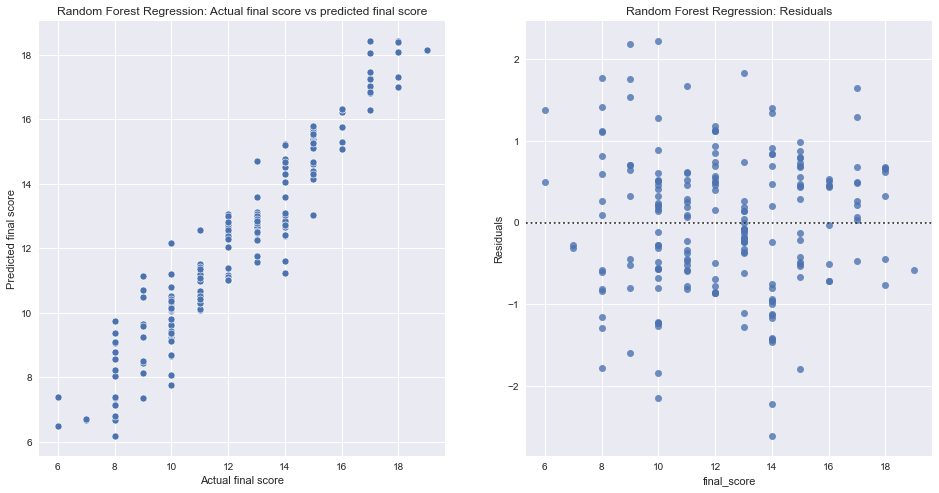

In [180]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('Random Forest Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('Random Forest Regression: Residuals')
b2.set_ylabel('Residuals')
#plt.savefig('images/ada_boost')
plt.show()

Let's move to our final ensemble model XGBoost Regressor

## XGBoost Regsessor

Let's try XGBoost Regressor now. First we will do hyperparameter optimization.

In [181]:
## Hyper Parameter Optimization
n_estimators = [100, 200, 300, 400,500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    "gamma": np.linspace(0, 5,10),
    "eta":np.linspace(0.1,0.3,10)
    }

# Set up the random search with 5-fold cross validation
random_xgb = RandomizedSearchCV(estimator=xgb.XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=100,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 100, 
            return_train_score = True,
            random_state=42)

random_xgb.fit(X_train_new,y_train)
print(random_xgb.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 3.8888888888888893, 'eta': 0.18888888888888888}


In [182]:
# the optimized model
xgb_reg = xgb.XGBRegressor(n_estimators=400, eta=0.18, max_depth=2, gamma=3.89, 
                           min_child_weight=4, learning_rate=0.2)
xgb_reg.fit(X_train_new, y_train)

# fit on the training data
xgb_reg.fit(X_train_new, y_train)

# make predictions on the test set
y_pred = xgb_reg.predict(X_test_new)

# calculate root mean squared error on test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# calculate mean absolute error on test set
mae = mean_absolute_error(y_test, y_pred)

# calculate r2-squared on test set
r2 = r2_score(y_test, y_pred)
 
print("RMSE for XGBoost Regressor:", rmse)
print("MAE for XGBoost Regressor:", mae)
print("R-Squared for XGBoost Regressor:", r2)

RMSE for XGBoost Regressor: 0.8201549678393322
MAE for XGBoost Regressor: 0.6542505570991555
R-Squared for XGBoost Regressor: 0.9150467287183739


XGBoost gave us a very good accuracy but considering the time it takes to train and factors like interpretability of the features, I will prefer Random Forest.

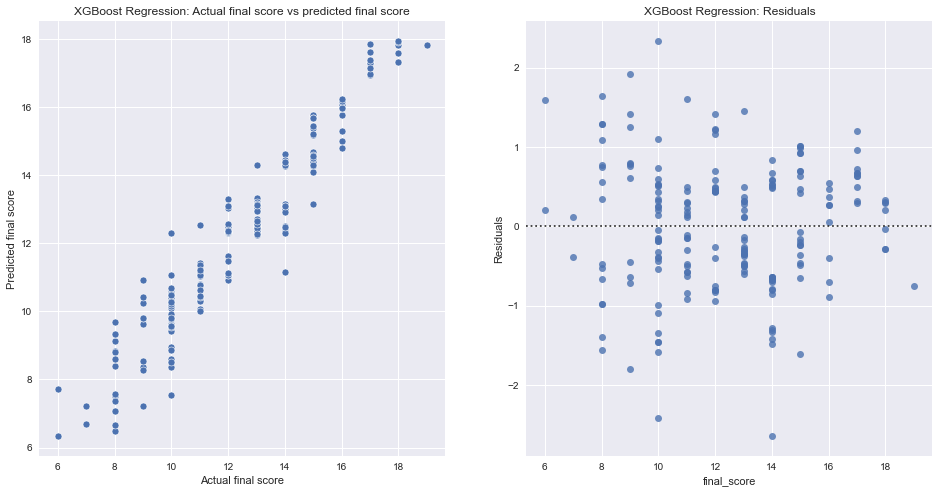

In [183]:
fig, ax =plt.subplots(figsize=(16,8),nrows=1,ncols=2)

b1 = sns.scatterplot(x=y_test, y=y_pred, ax=ax[0])
b1.set_title('XGBoost Regression: Actual final score vs predicted final score')
b1.set_xlabel('Actual final score')
b1.set_ylabel('Predicted final score')

b2 = sns.residplot(x=y_test, y=y_pred, ax=ax[1])
b2.set_title('XGBoost Regression: Residuals')
b2.set_ylabel('Residuals')
#plt.savefig('images/XGBoost')
plt.show()

These were all the models that we use. Let's compare their performance now.

## Evaluation

Here are the testing accuracies for all the 6 hyper-parameter tuned models and the baseline dummy model. We tested each one 5 times(5 different samples of testing set) and presented the mean accuracy metrics for all of these models.

| ![model_accuracies.jpg](images/model_accuracies.jpg) |
|:--:|
| <b>Fig.2 Mean Accuracy Metrics for all of our ML models
  </b>|

The best accuracy was received with the Random Forest Model. Random Forest are excellent for analysis as they are very robust models and also help provide key insights from the model. 

For example, Random Forest gave us the subset of features that are most useful in predicting student's final score. These are:

1. `study_time`
2. `mother_education`
3. `father_education`
4. `failures`
5. `free_time`
6. `go_out`
7. `weekday_alcohol_usage`
8. `weekend_alcohol_usage`
9. `health`
10. `absences`
11. `school_support`
12. `paid_classes`
13. `desire_higher_edu`
14. `period1_score`
15. `period2_score`
16. `age`

## Conclusion 

Student's academic success is usually thought to be dependent on student's dedication and hardwork. This analyses pointed out that while those parameters are important, there are other background factors that impact student's final score. 

The Exploratory Data Analysis revealed many interesting ideas from the data such as:
1. Father's education status seems to be more relevant to student's success. 
2. Students living with both their parents or stable households seem to be perform better. 
3. Students who wish to go for higher education perform better in school.
4. Increased commute time has a negative impact on academic performance. 

These are just some of the insights that were found in the data. These ideas were than supported by the machine learning modeling stage which showed that the same features were important for predicting final score. 

We selected Random Forest Regressor as our final model where we received a mean R-Squared of 0.92. 

## Future Work

While we have covered a lot of bases in this analysis, more can be done to improve the analysis further.

It would be interesting to implement an online system where we look at these factors while a student is studying and then conduct experiments to see, if additional school support can help students who are predicted to perform poorly. 

Many of the analyses presented in this report can be used as guidelines and recommendations for school districts. For example, providing students, who don't have access to internet at home, with mobile hotspots. 

We can also study school dropouts in more details and analyze the factors that cause dropout in more detail. 

In the next iteration, we would also like to deploy our ML model as web application which is integrated with the school district rostering systems. This will allow for schools to continuously monitor the progress of its students and take corrective measures if required.